In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import json

from fitness_observer import FitnessObserver
from labs_simulation import run_genetic_algorithm

In [33]:
from collections import defaultdict

iterations = 100
iterations_axis = [i for i in range(iterations)]
repetitions_number = 50

# this variable stores best (lowest) objective function values in each iteration for each run of each algorithm
# e.g. solutions["base"] is a list of length `repetitions_number` with elements that are lists of length `iterations`
solutions = defaultdict(list)

In [34]:
from typing import List, Tuple

def get_fitness_mean_and_std(fitness_observers: List[FitnessObserver]) -> Tuple[List, List]:
    fitness_mean = [np.mean([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    fitness_std = [np.std([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    return fitness_mean, fitness_std

In [35]:
def draw_fitness_plots(fitness_observers: List[FitnessObserver], mean_fitness: List[float], algorithm_name: str):
    figure, axis = plt.subplots(1, 2, figsize=(12, 6))
    figure.tight_layout()
    axis[0].set_title(f"Fitness in {algorithm_name} algorithm")
    for fitness_observer in fitness_observers:
        axis[0].plot(iterations_axis, fitness_observer.fitness[:100])

    axis[1].set_title(f"Mean fitness in {algorithm_name} algorithm")
    axis[1].plot(iterations_axis, mean_fitness)
    plt.show()

def draw_fitness_boxplots(fitness_observers: List[FitnessObserver]):
    included_iterations = [i for i in range(0, 101, 10)]
    plt.boxplot([[fitness_observer.fitness[i] for fitness_observer in fitness_observers]
                 for i in included_iterations],
                positions=included_iterations, widths=3)
    plt.show()

## Base algorithm

In [36]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [ ]:
base_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in base_fitness_observers:
    run_genetic_algorithm(GeneticAlgorithm, 0.5, observers=[fitness_observer])
    solutions["base"].append(fitness_observer.fitness)

In [38]:
base_fitness_mean, base_fitness_std = get_fitness_mean_and_std(base_fitness_observers)

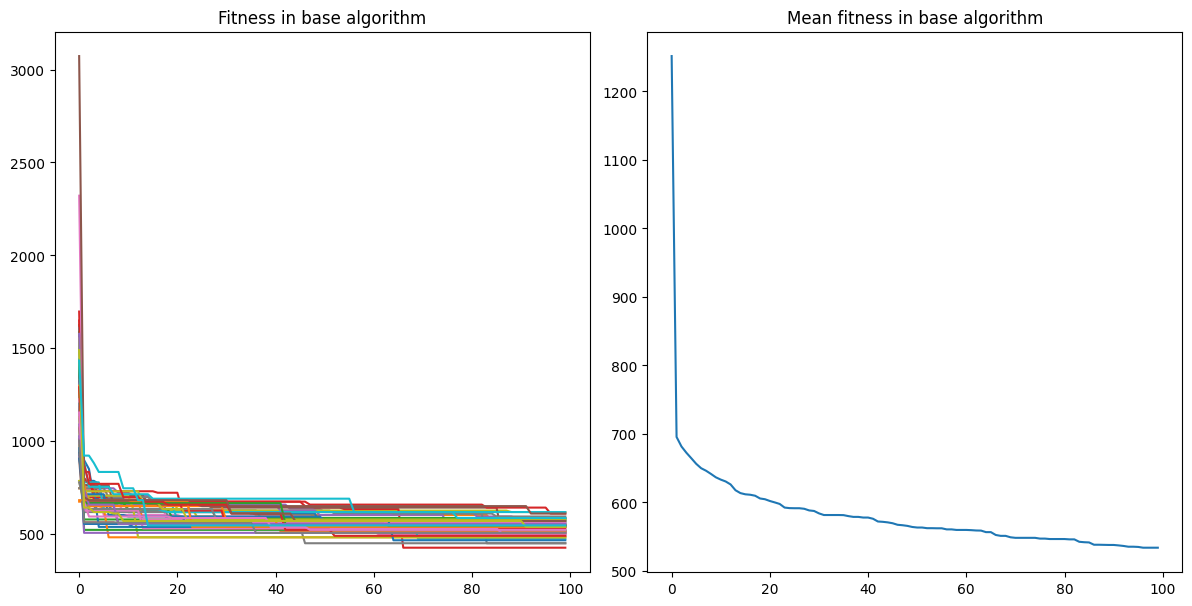

In [39]:
draw_fitness_plots(base_fitness_observers, base_fitness_mean, "base")

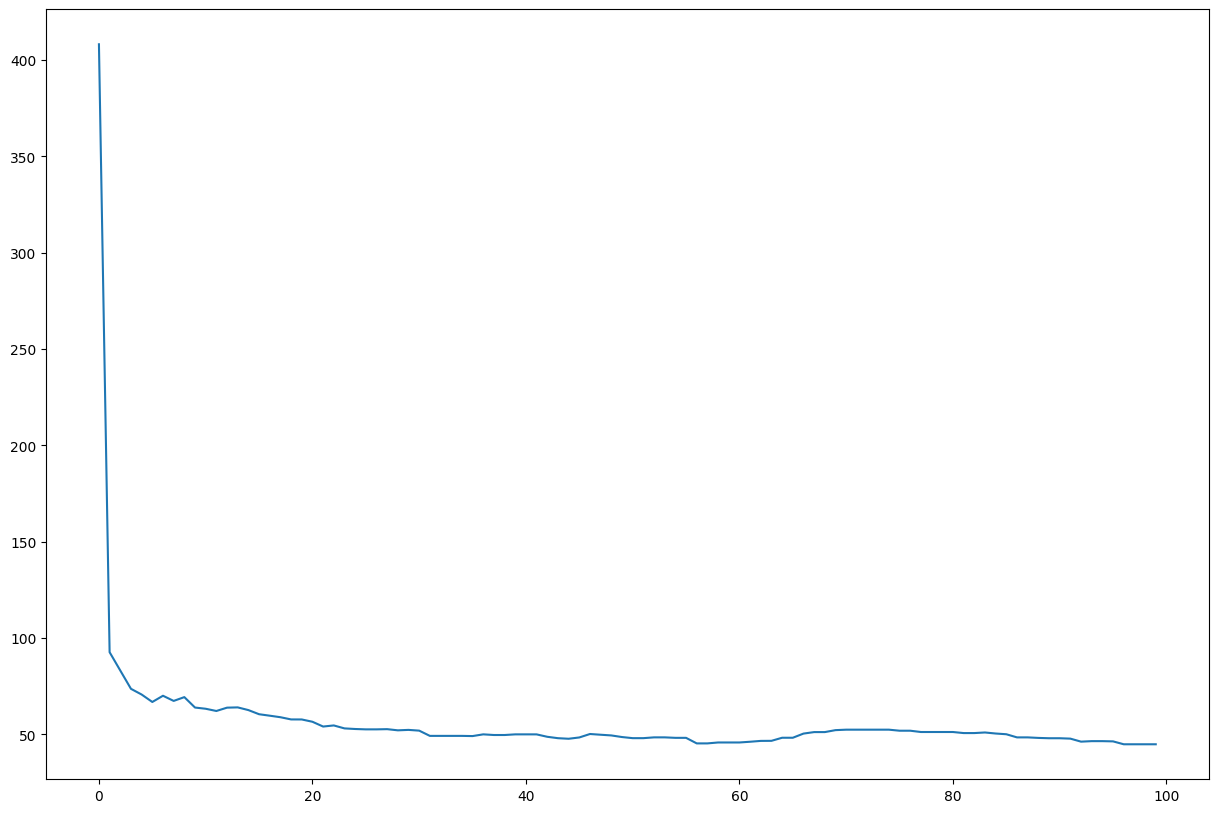

In [40]:
plt.plot(iterations_axis, base_fitness_std)
plt.show()

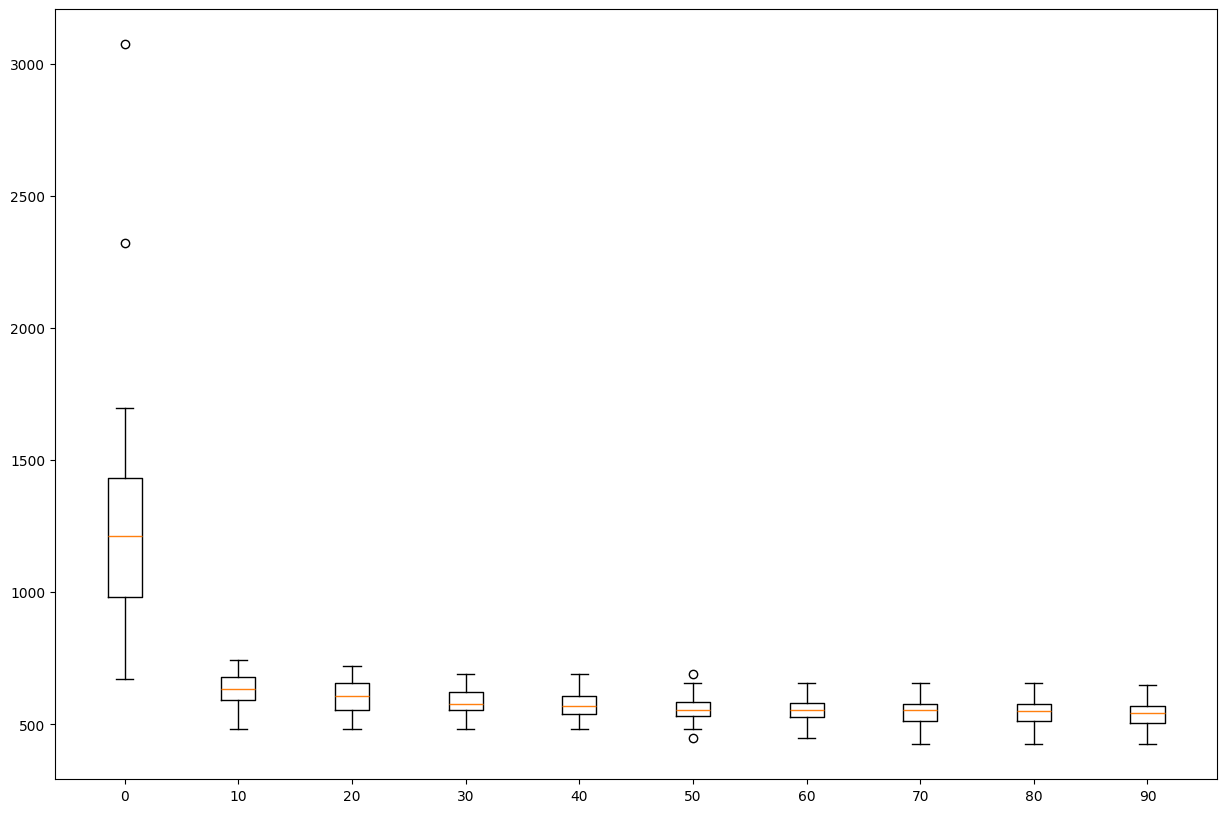

In [41]:
draw_fitness_boxplots(base_fitness_observers)

## Follow Best

In [42]:
from follow_best import FollowBestGA

In [ ]:
follow_best_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_fitness_observers:
    run_genetic_algorithm(FollowBestGA, 0.5, observers=[fitness_observer])
    solutions["follow best"].append(fitness_observer.fitness)

In [44]:
follow_best_fitness_mean, follow_best_fitness_std = get_fitness_mean_and_std(follow_best_fitness_observers)

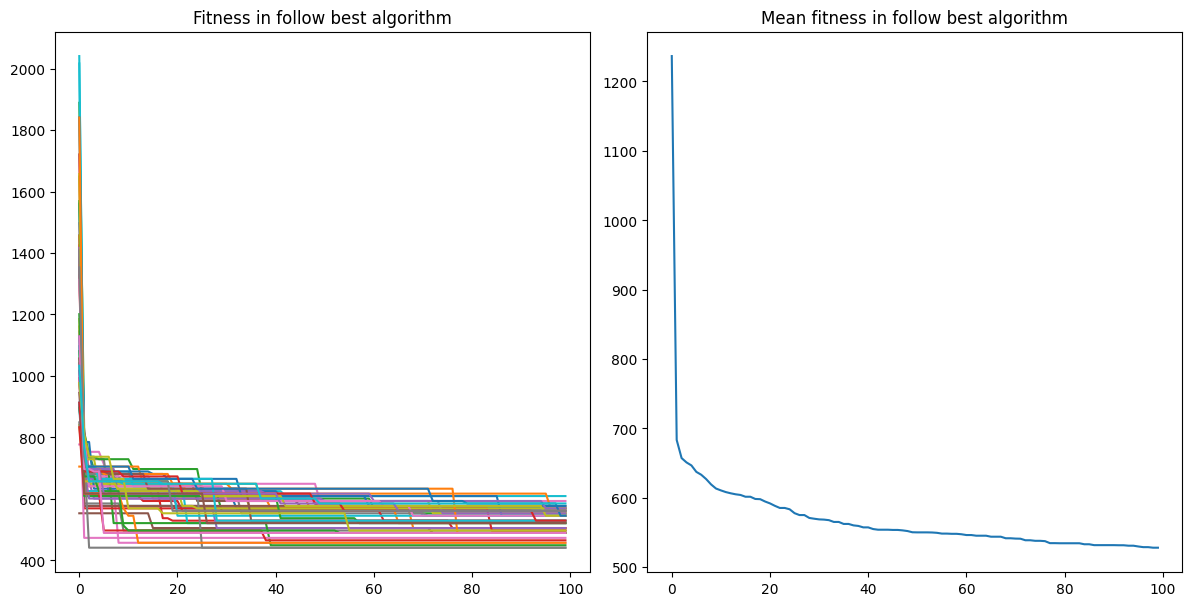

In [45]:
draw_fitness_plots(follow_best_fitness_observers, follow_best_fitness_mean, "follow best")

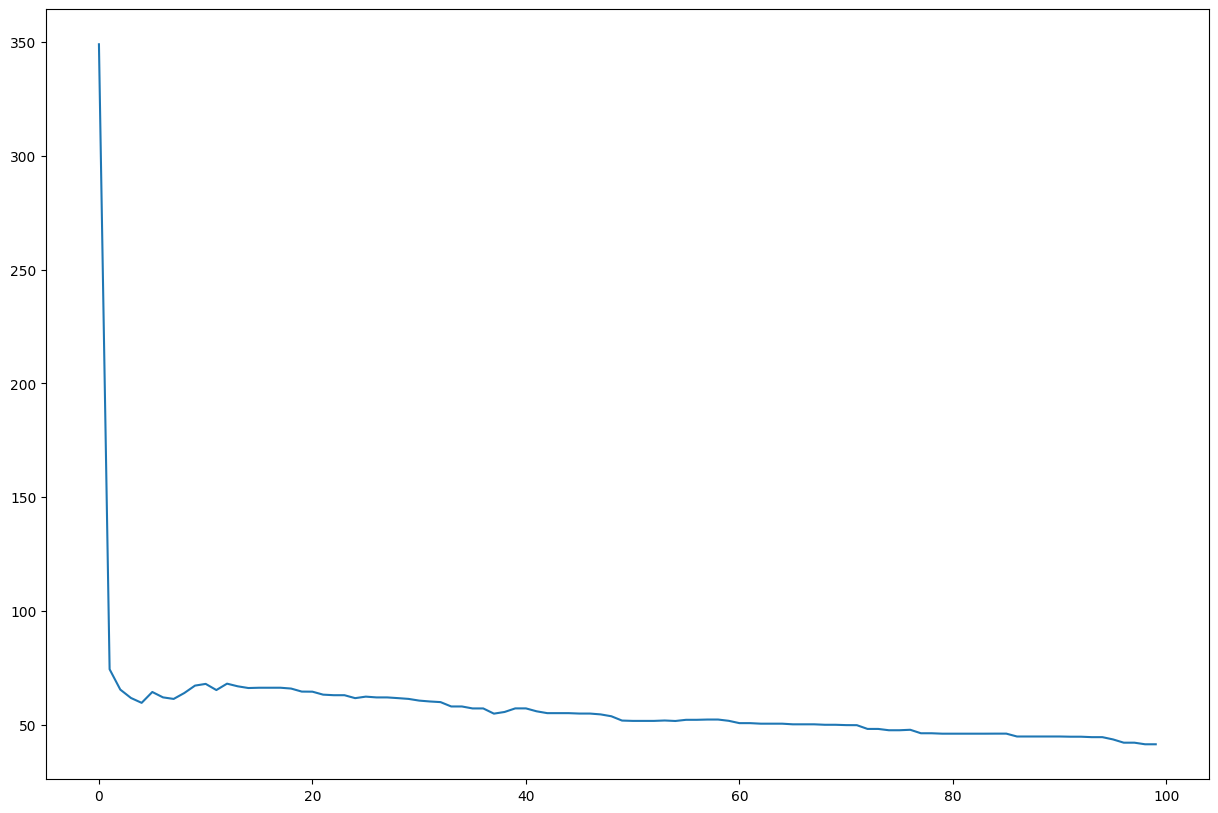

In [46]:
plt.plot(iterations_axis, follow_best_fitness_std)
plt.show()

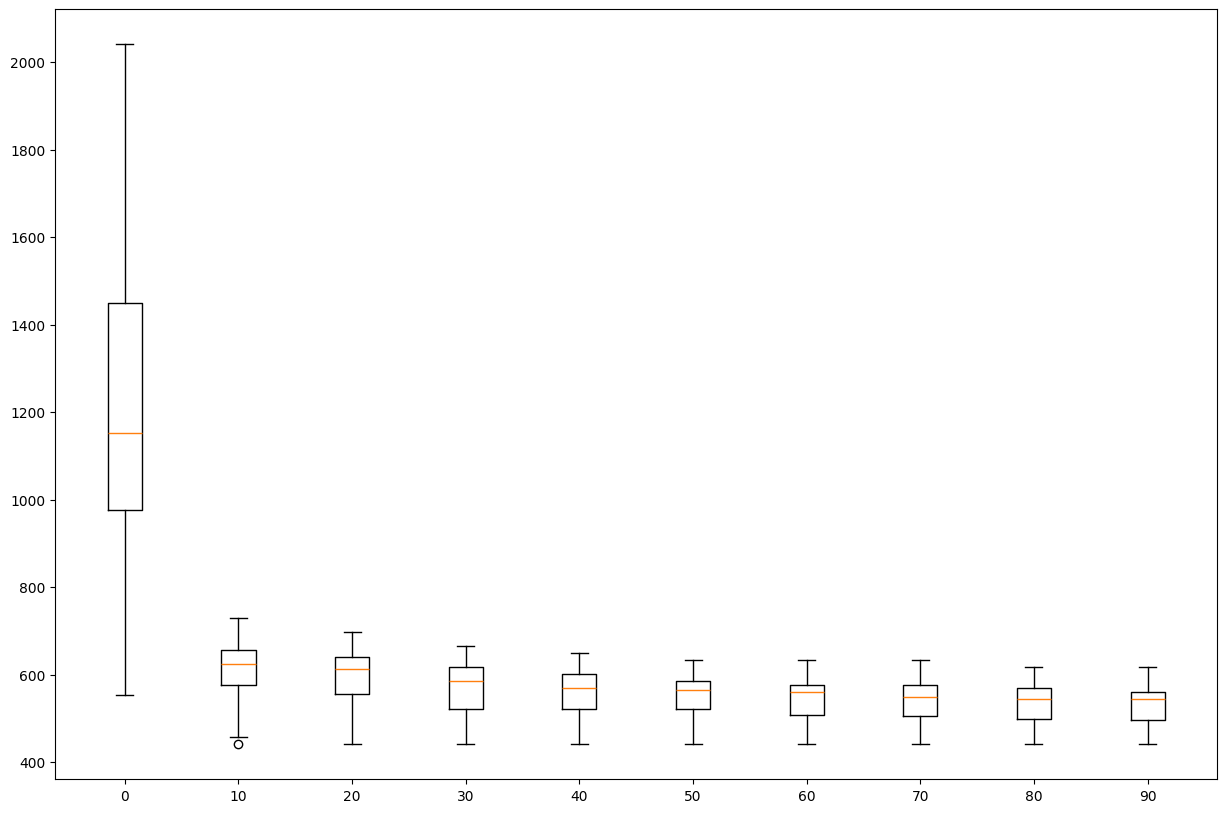

In [47]:
draw_fitness_boxplots(follow_best_fitness_observers)

## Follow Best (1 gene mutation)

In [ ]:
follow_best_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_fitness_observers1:
    run_genetic_algorithm(FollowBestGA, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best (1 gene)"].append(fitness_observer.fitness)

In [49]:
follow_best_fitness_mean1, follow_best_fitness_std1 = get_fitness_mean_and_std(follow_best_fitness_observers1)

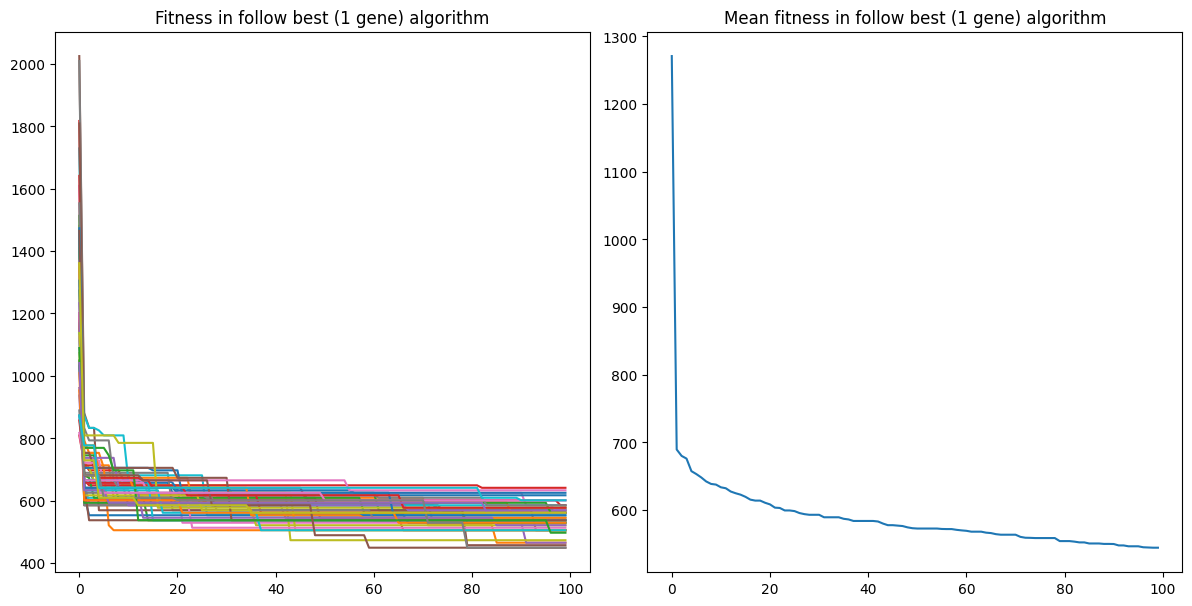

In [50]:
draw_fitness_plots(follow_best_fitness_observers1, follow_best_fitness_mean1, "follow best (1 gene)")

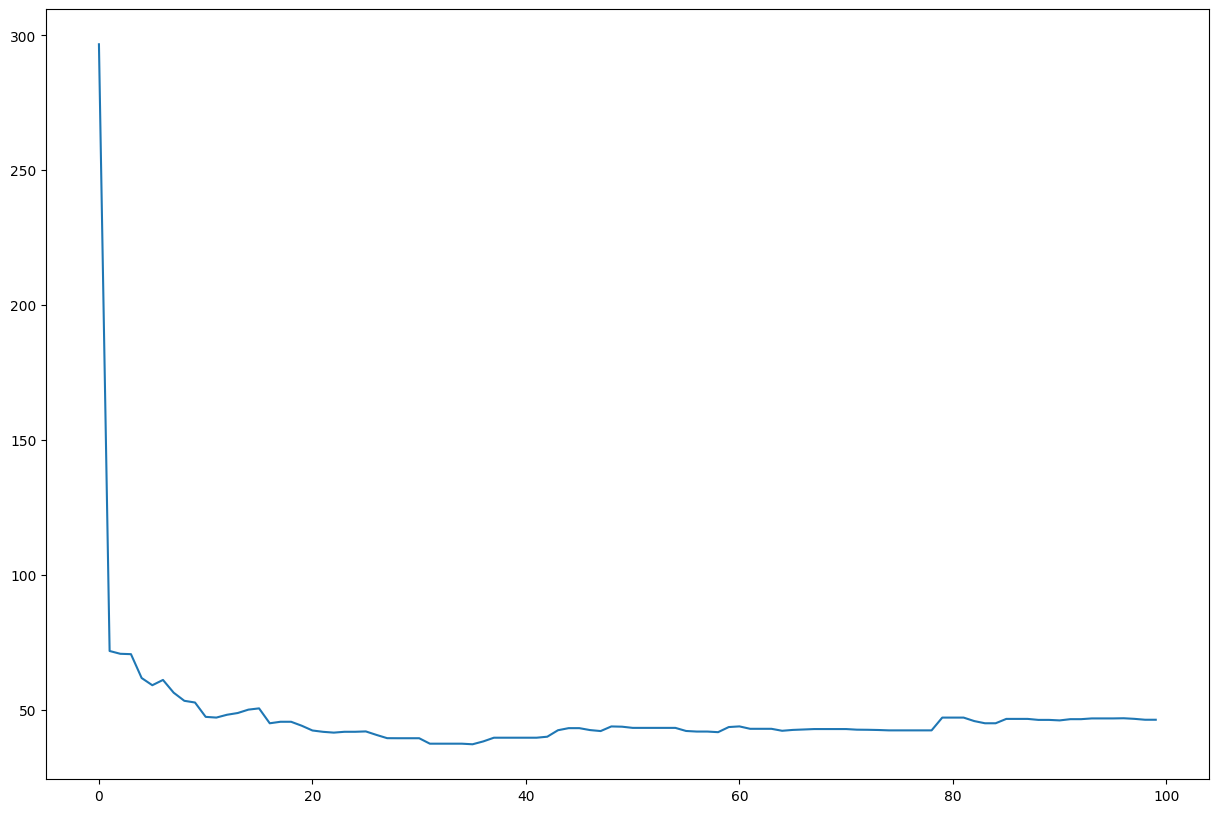

In [51]:
plt.plot(iterations_axis, follow_best_fitness_std1)
plt.show()

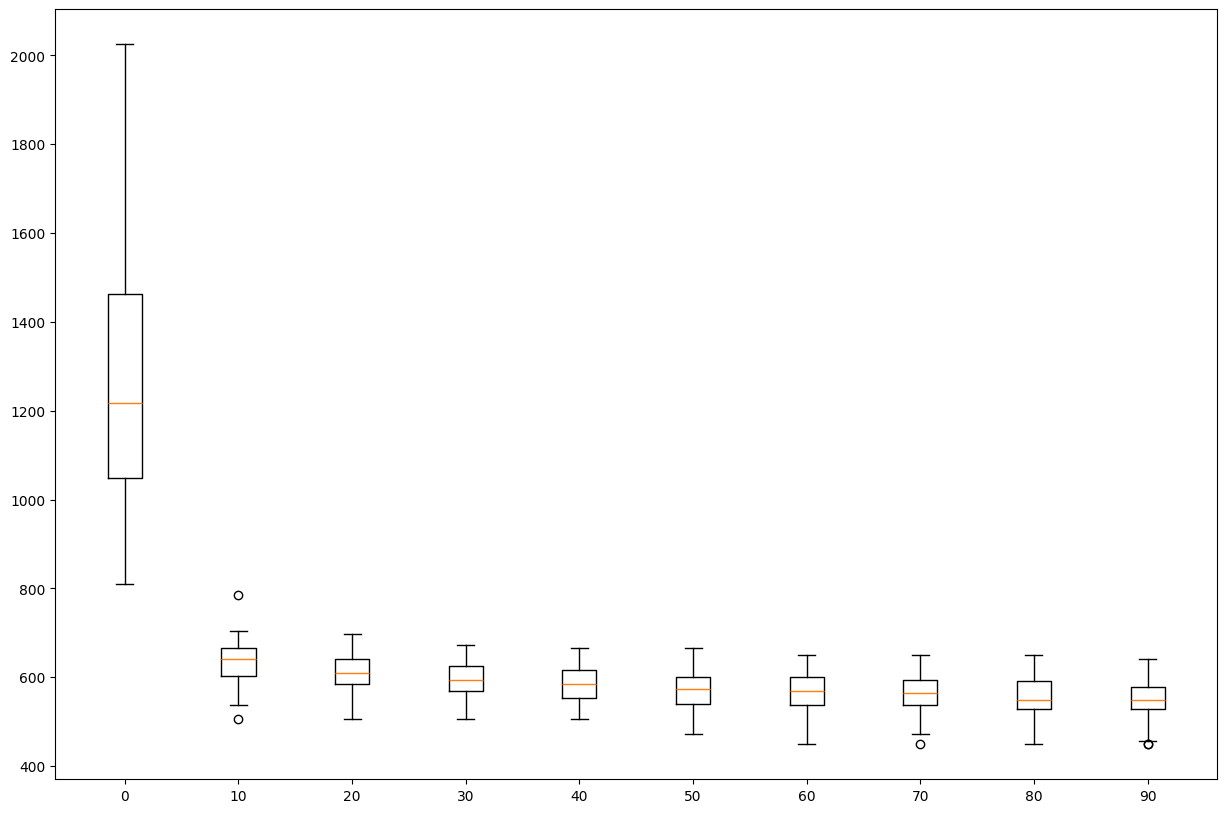

In [52]:
draw_fitness_boxplots(follow_best_fitness_observers1)

## Follow Best Distinct

In [53]:
from follow_best_distinct import FollowBestDistinctGA

In [ ]:
follow_best_distinct_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_distinct_fitness_observers:
    run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[fitness_observer])
    solutions["follow best distinct"].append(fitness_observer.fitness)

In [55]:
follow_best_distinct_fitness_mean, follow_best_distinct_fitness_std = get_fitness_mean_and_std(follow_best_distinct_fitness_observers)

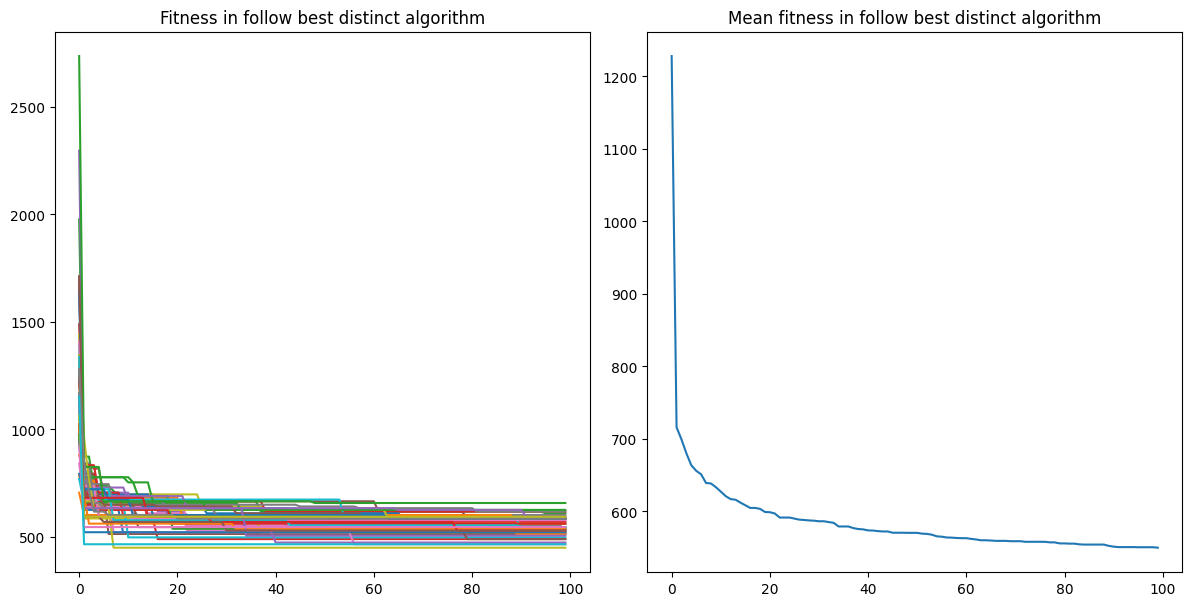

In [56]:
draw_fitness_plots(follow_best_distinct_fitness_observers, follow_best_distinct_fitness_mean, "follow best distinct")

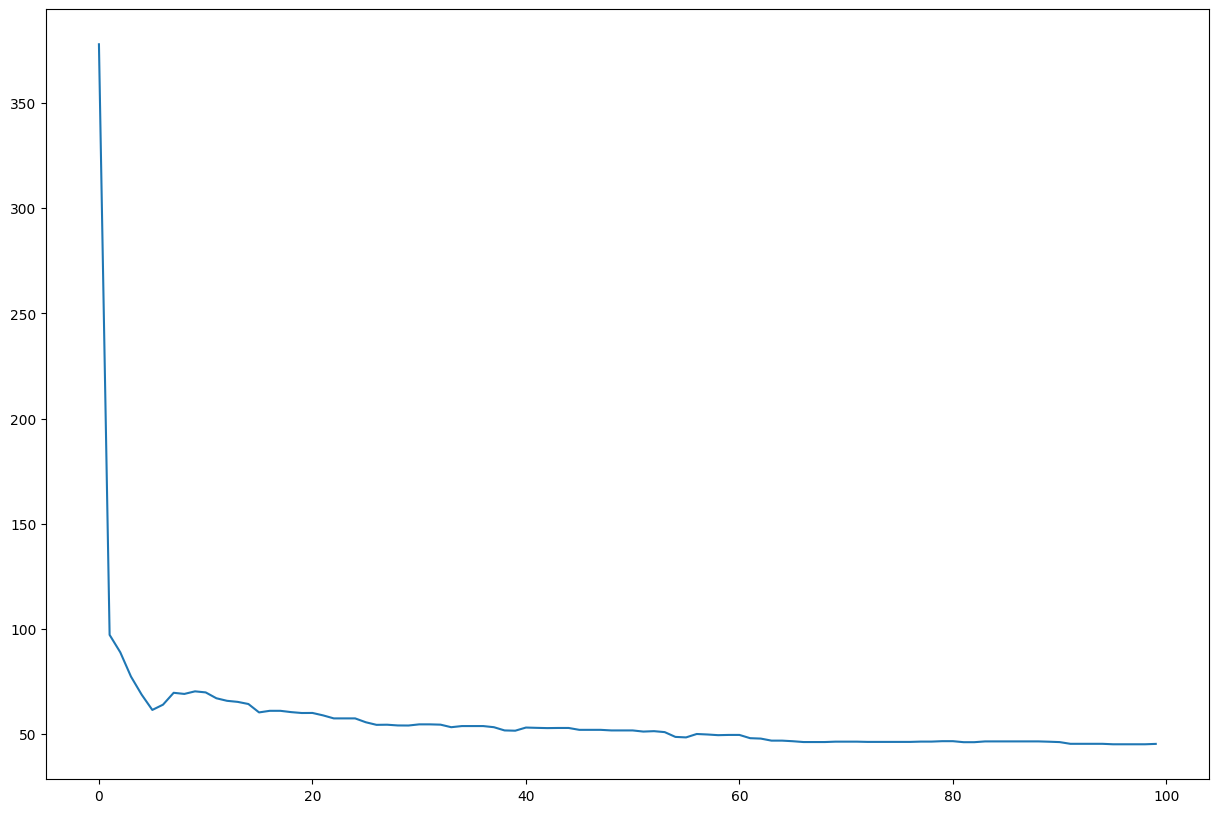

In [57]:
plt.plot(iterations_axis, follow_best_distinct_fitness_std)
plt.show()

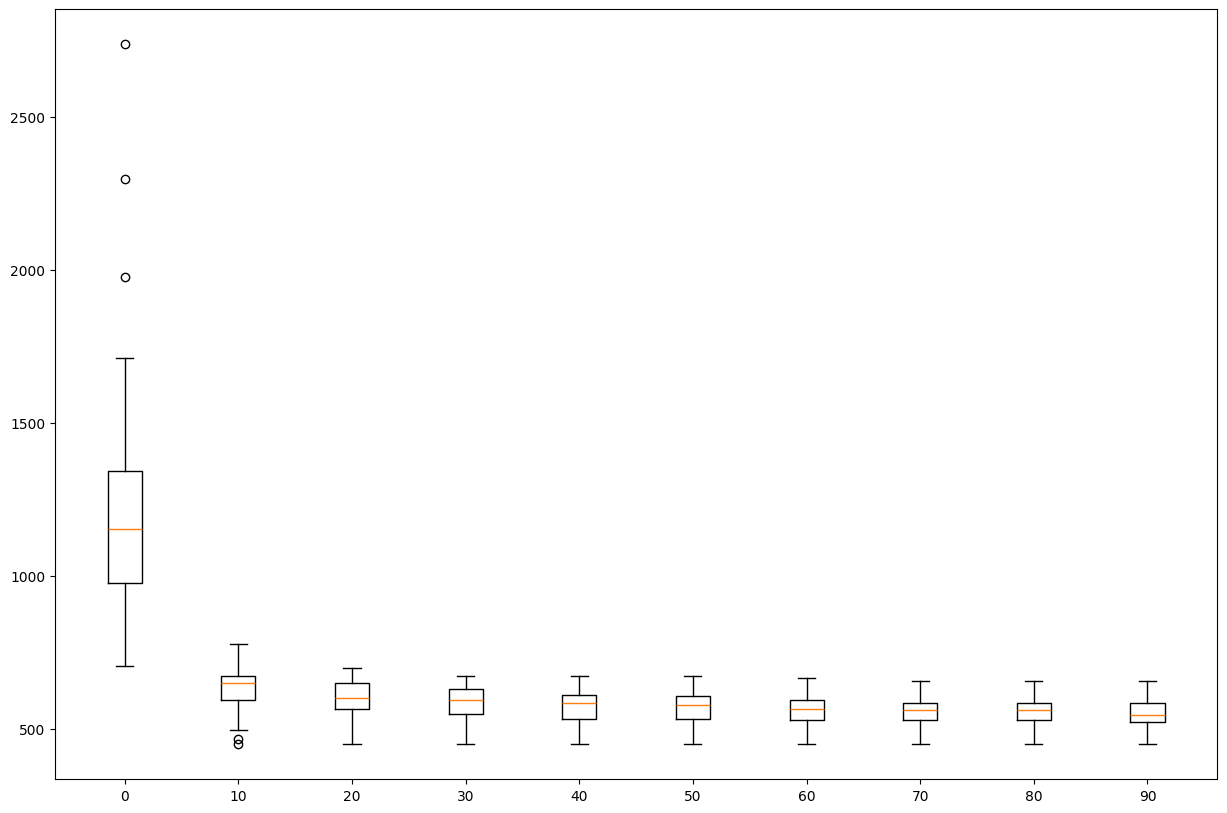

In [58]:
draw_fitness_boxplots(follow_best_distinct_fitness_observers)

## Follow Best Distinct (1 gene)

In [ ]:
follow_best_distinct_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_distinct_fitness_observers1:
    run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best distinct (1 gene)"].append(fitness_observer.fitness)

In [60]:
follow_best_distinct_fitness_mean1, follow_best_distinct_fitness_std1 = get_fitness_mean_and_std(follow_best_distinct_fitness_observers1)

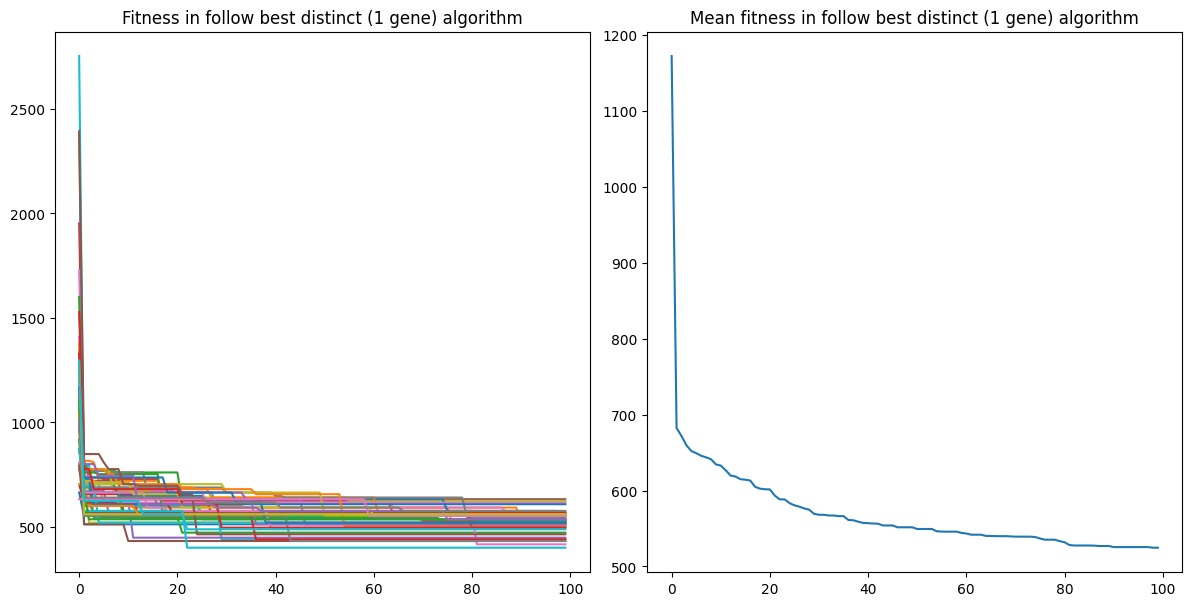

In [61]:
draw_fitness_plots(follow_best_distinct_fitness_observers1, follow_best_distinct_fitness_mean1, "follow best distinct (1 gene)")

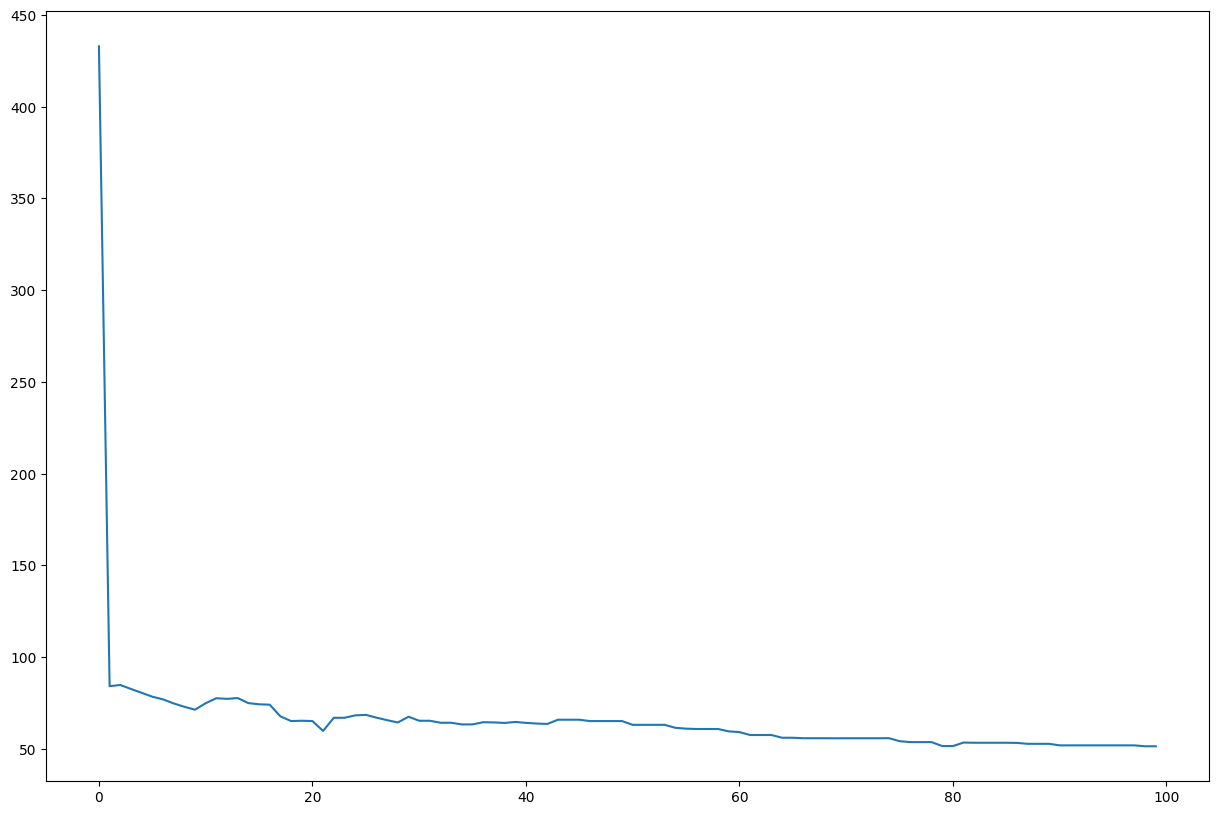

In [62]:
plt.plot(iterations_axis, follow_best_distinct_fitness_std1)
plt.show()

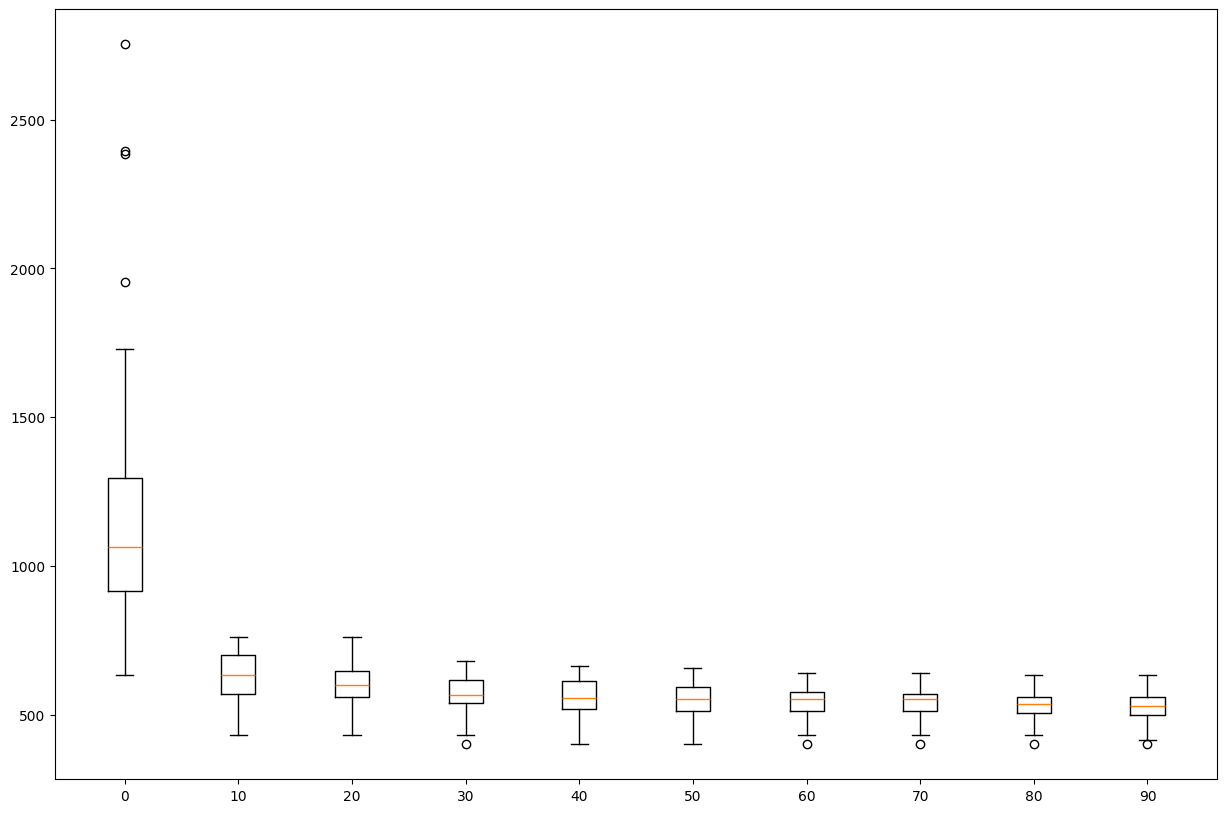

In [63]:
draw_fitness_boxplots(follow_best_distinct_fitness_observers1)

## Repel Worst Gravity

In [64]:
from repel_worst_gravity import RepelWorstGravity

In [ ]:
repel_worst_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_fitness_observers:
    run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[fitness_observer])
    solutions["repel worst"].append(fitness_observer.fitness)

In [66]:
repel_worst_fitness_mean, repel_worst_fitness_std = get_fitness_mean_and_std(repel_worst_fitness_observers)

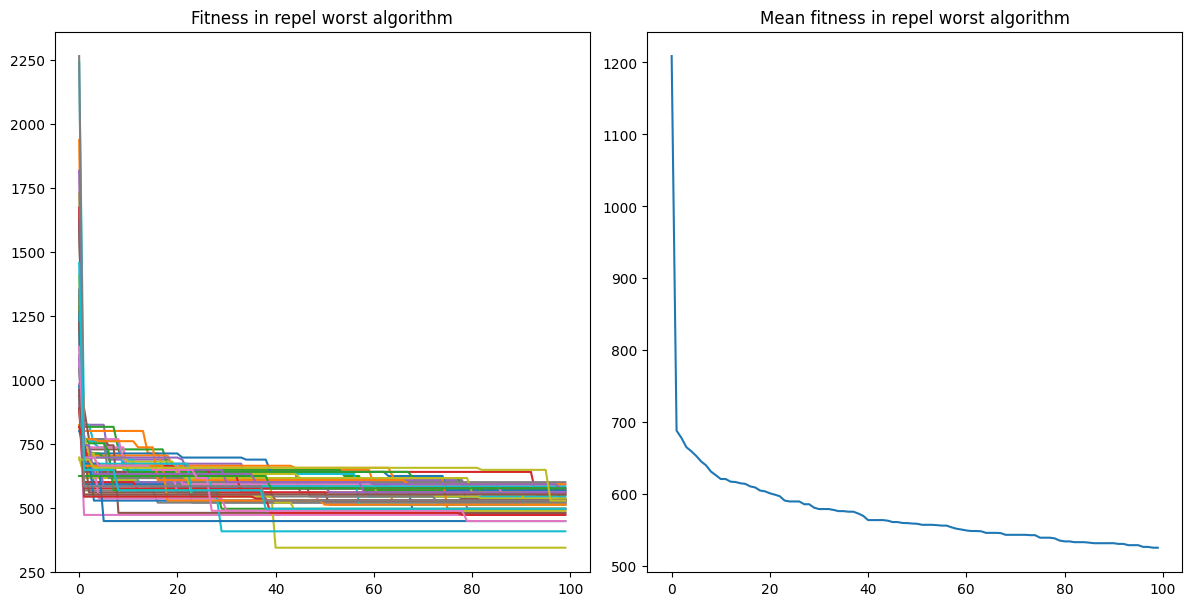

In [67]:
draw_fitness_plots(repel_worst_fitness_observers, repel_worst_fitness_mean, "repel worst")

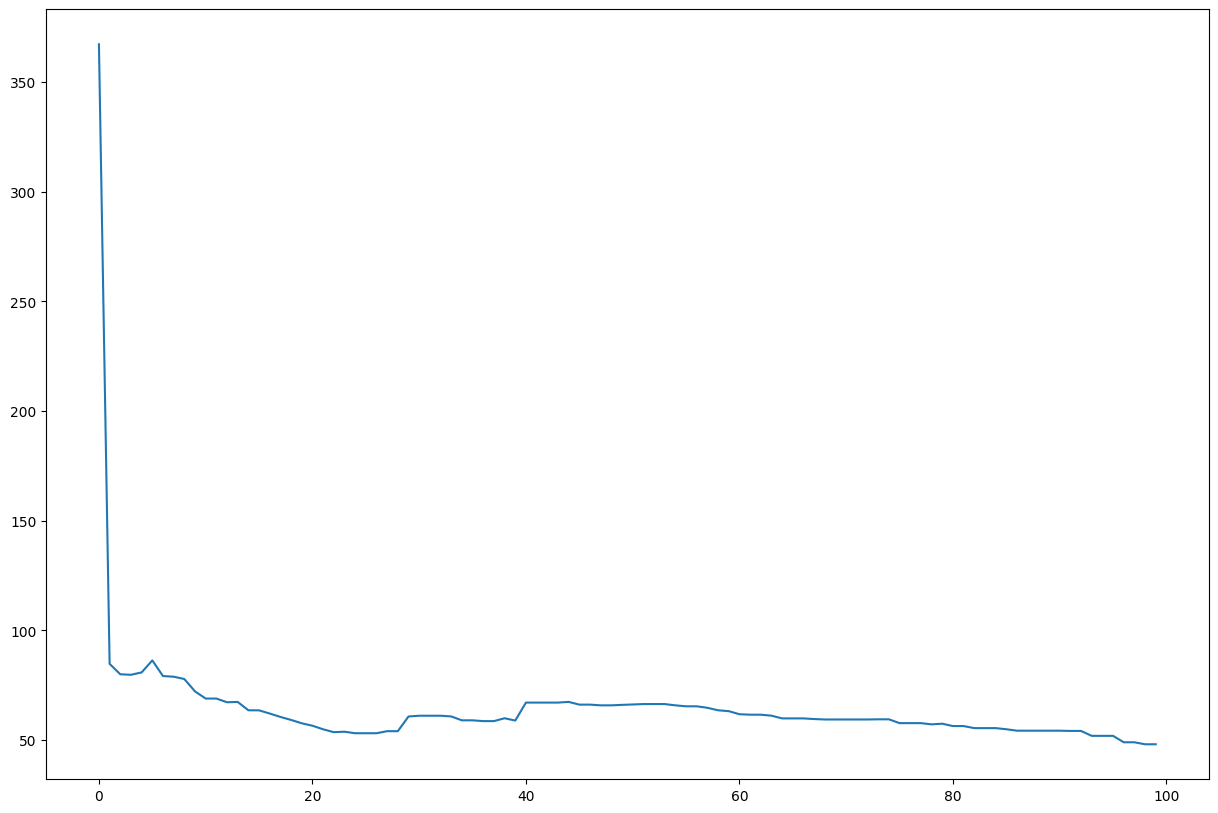

In [68]:
plt.plot(iterations_axis, repel_worst_fitness_std)
plt.show()

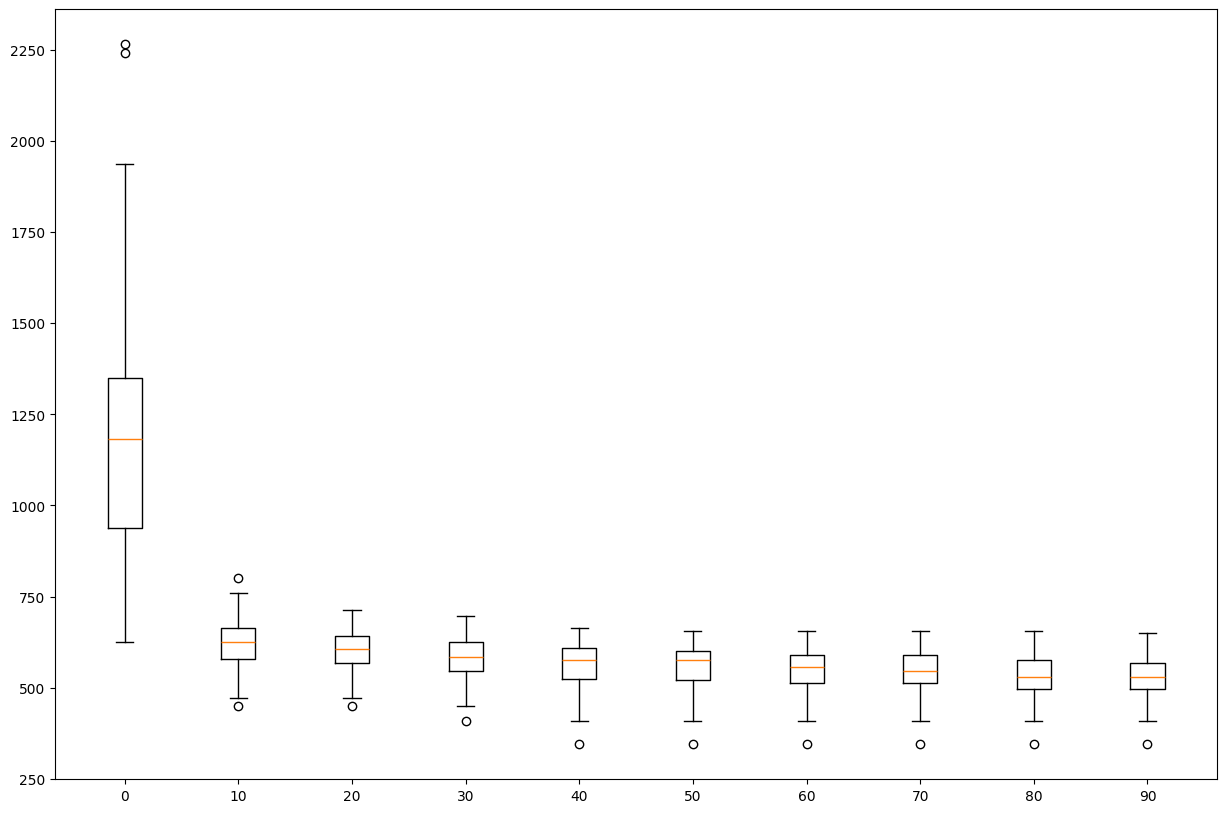

In [69]:
draw_fitness_boxplots(repel_worst_fitness_observers)

## Repel Worst Gravity (1 gene)

In [ ]:
repel_worst_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_fitness_observers1:
    run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["repel worst (1 gene)"].append(fitness_observer.fitness)

In [71]:
repel_worst_fitness_mean1, repel_worst_fitness_std1 = get_fitness_mean_and_std(repel_worst_fitness_observers1)

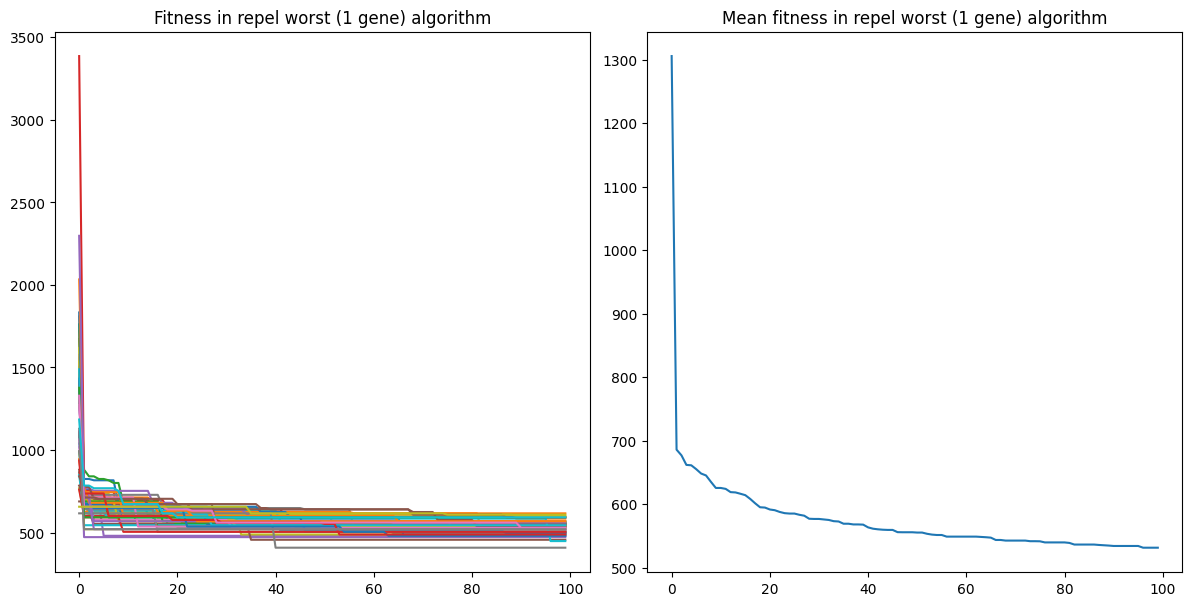

In [72]:
draw_fitness_plots(repel_worst_fitness_observers1, repel_worst_fitness_mean1, "repel worst (1 gene)")

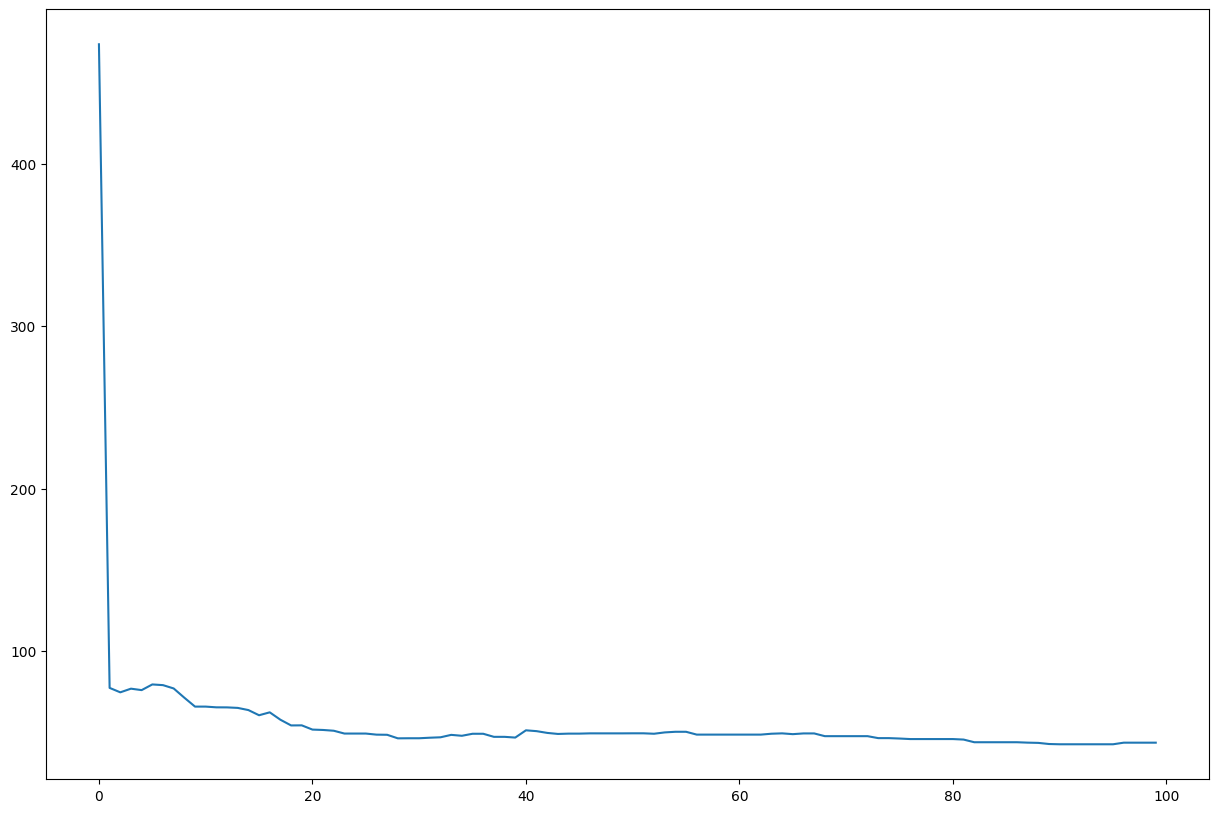

In [73]:
plt.plot(iterations_axis, repel_worst_fitness_std1)
plt.show()

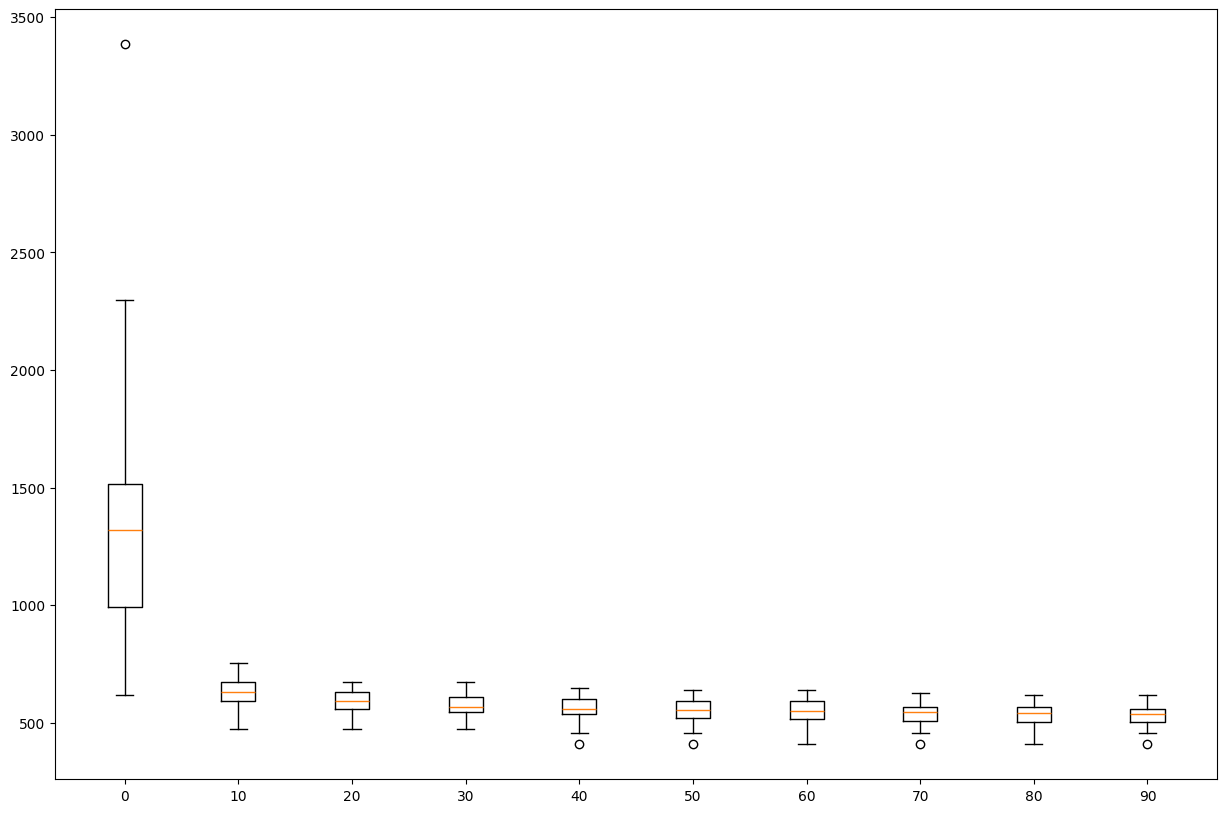

In [74]:
draw_fitness_boxplots(repel_worst_fitness_observers1)

## Repel Worst Gravity Multistep

In [75]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [ ]:
repel_worst_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_multistep_fitness_observers:
    run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[fitness_observer])
    solutions["repel worst multistep"].append(fitness_observer.fitness)

In [77]:
repel_worst_multistep_fitness_mean, repel_worst_multistep_fitness_std = get_fitness_mean_and_std(repel_worst_multistep_fitness_observers)

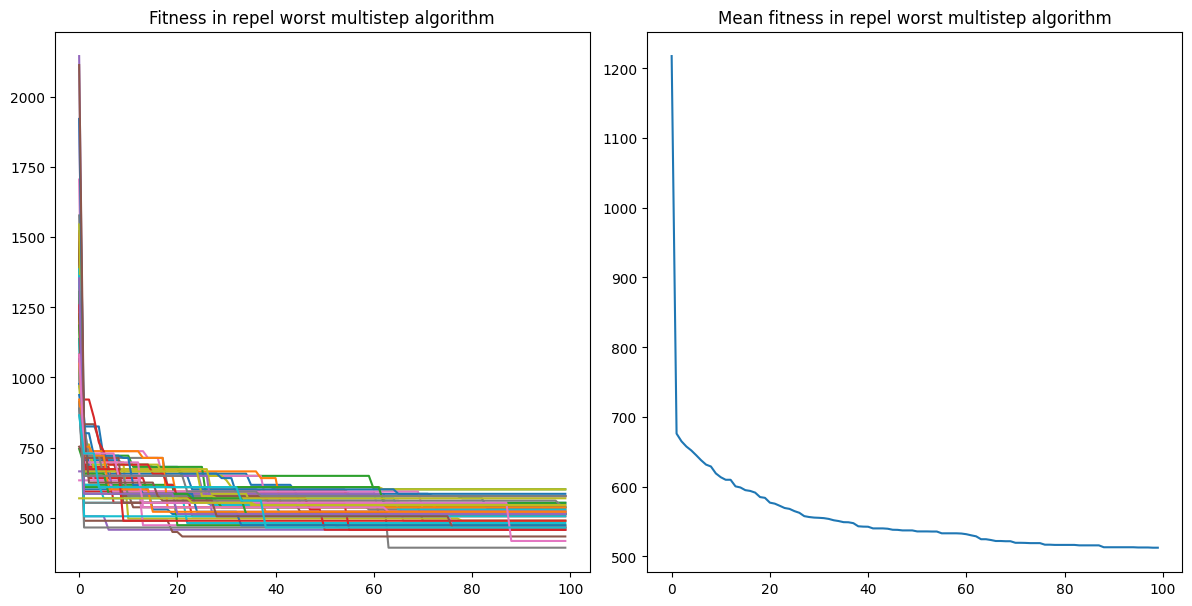

In [78]:
draw_fitness_plots(repel_worst_multistep_fitness_observers, repel_worst_multistep_fitness_mean, "repel worst multistep")

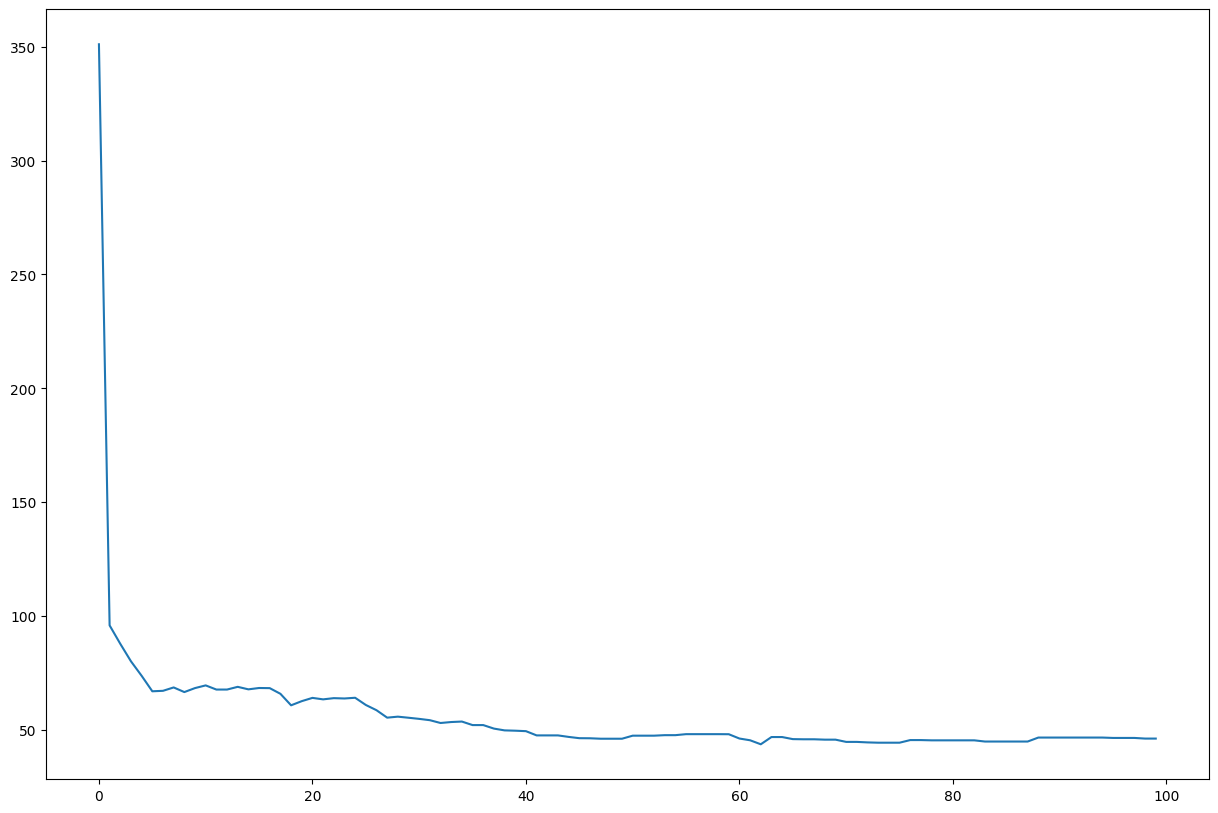

In [79]:
plt.plot(iterations_axis, repel_worst_multistep_fitness_std)
plt.show()

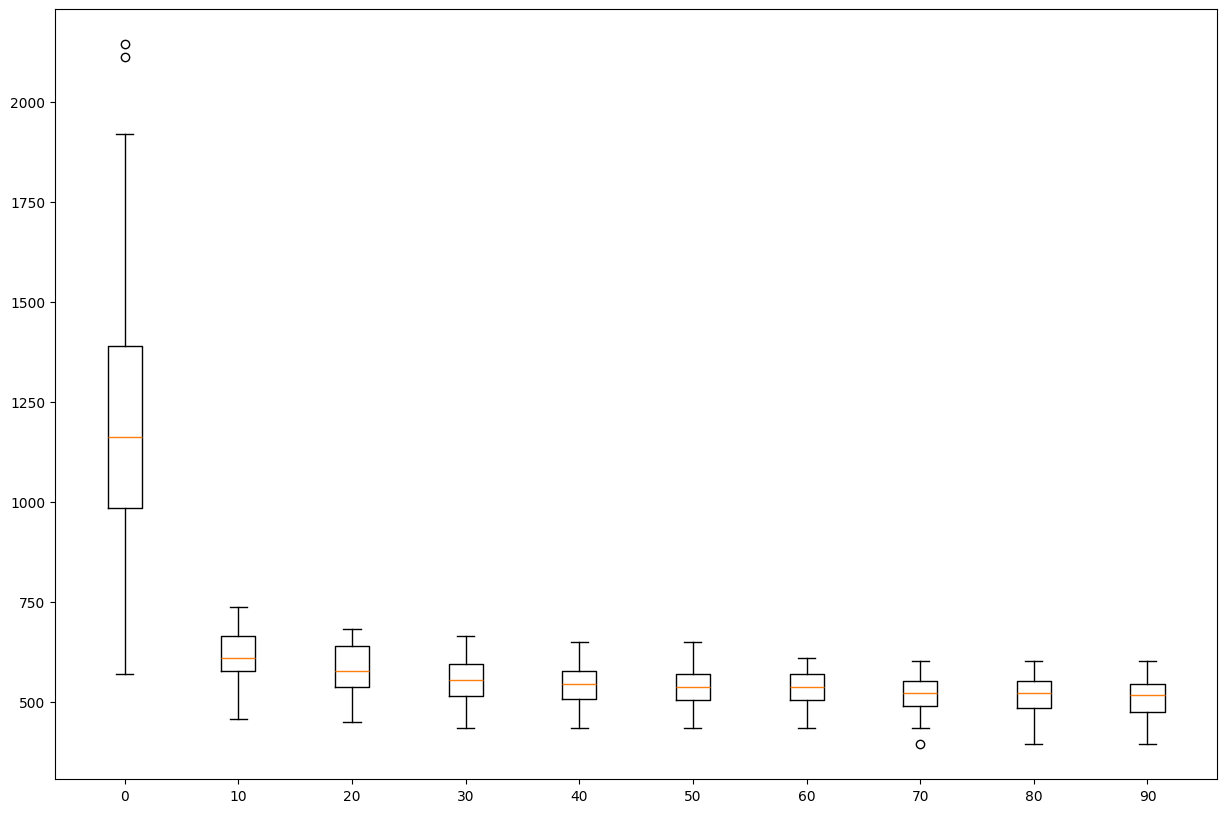

In [80]:
draw_fitness_boxplots(repel_worst_multistep_fitness_observers)

## Repel Worst Gravity Multistep (1 gene)

In [ ]:
repel_worst_multistep_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_multistep_fitness_observers1:
    run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["repel worst multistep (1 gene)"].append(fitness_observer.fitness)

In [82]:
repel_worst_multistep_fitness_mean1, repel_worst_multistep_fitness_std1 = get_fitness_mean_and_std(repel_worst_multistep_fitness_observers1)

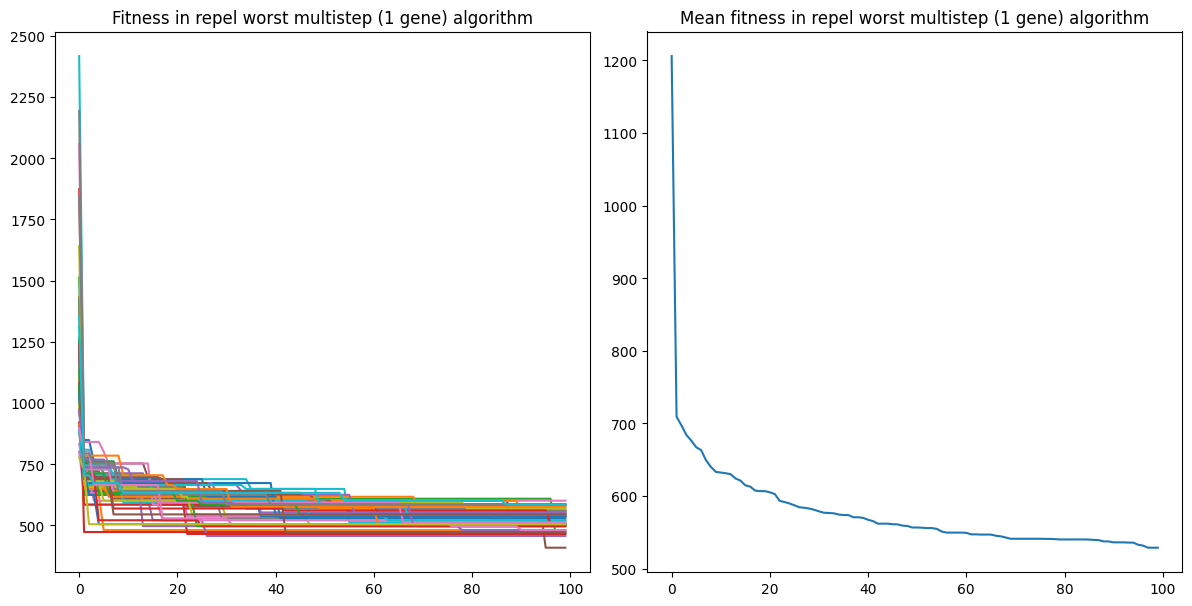

In [83]:
draw_fitness_plots(repel_worst_multistep_fitness_observers1, repel_worst_multistep_fitness_mean1, "repel worst multistep (1 gene)")

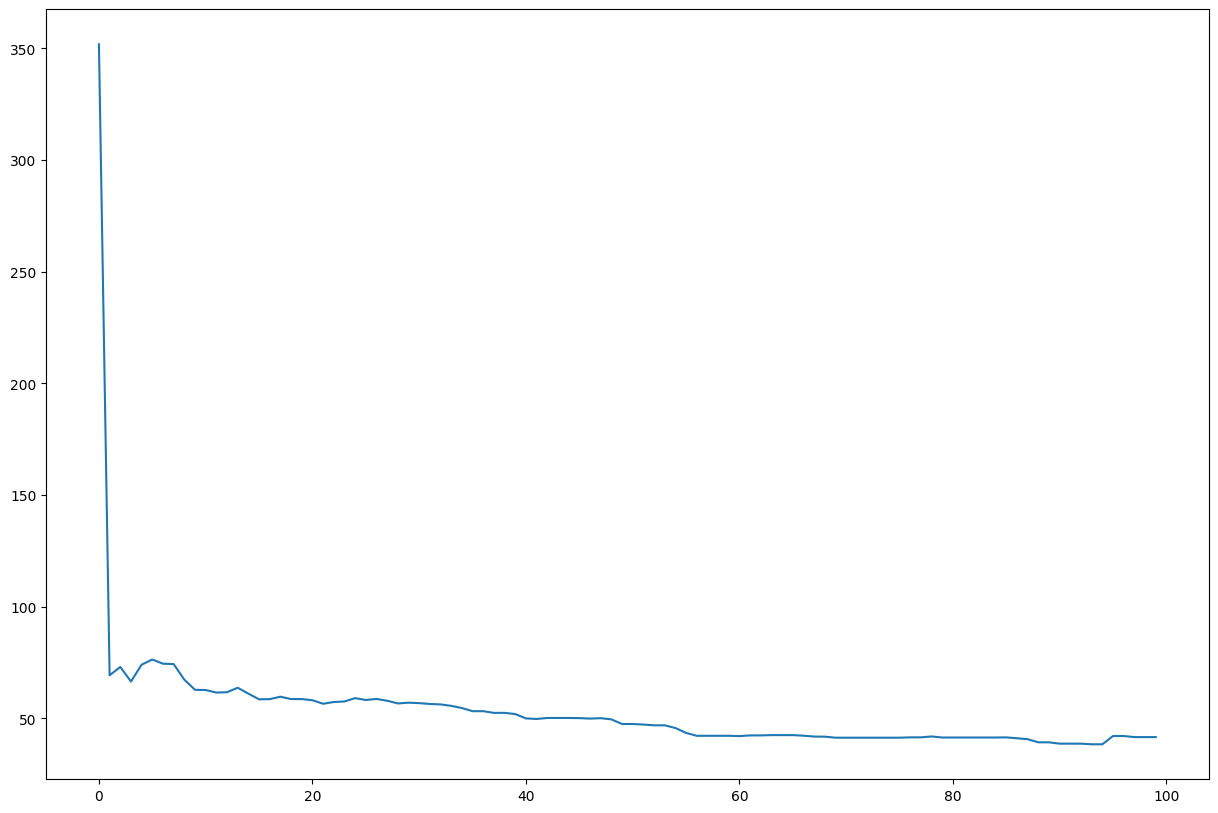

In [84]:
plt.plot(iterations_axis, repel_worst_multistep_fitness_std1)
plt.show()

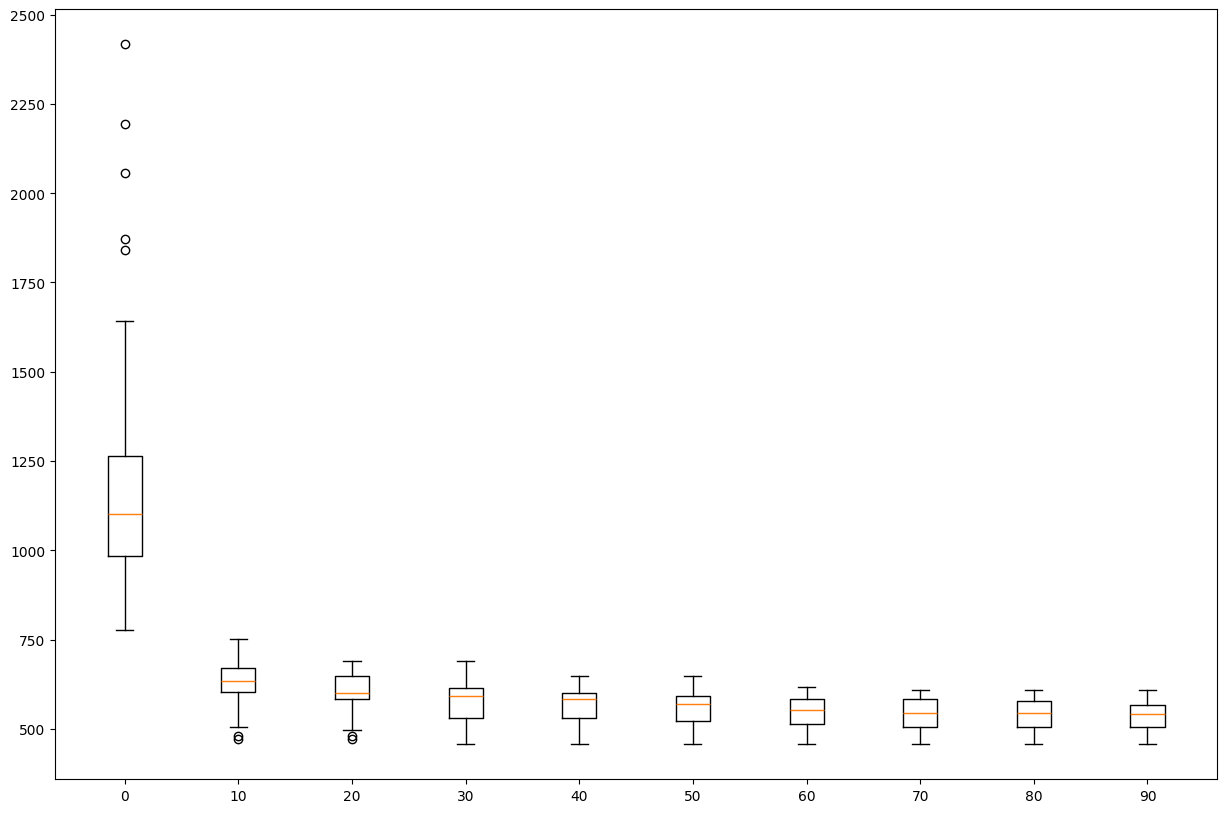

In [85]:
draw_fitness_boxplots(repel_worst_multistep_fitness_observers1)

## Follow Best + Repel Worst Gravity

In [86]:
from combo_best_gravity import ComboBestGravity

In [ ]:
combo_best_gravity_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_fitness_observers:
    run_genetic_algorithm(ComboBestGravity, 0.5, observers=[fitness_observer])
    solutions["follow best + repel worst"].append(fitness_observer.fitness)

In [88]:
combo_best_gravity_fitness_mean, combo_best_gravity_fitness_std = get_fitness_mean_and_std(combo_best_gravity_fitness_observers)

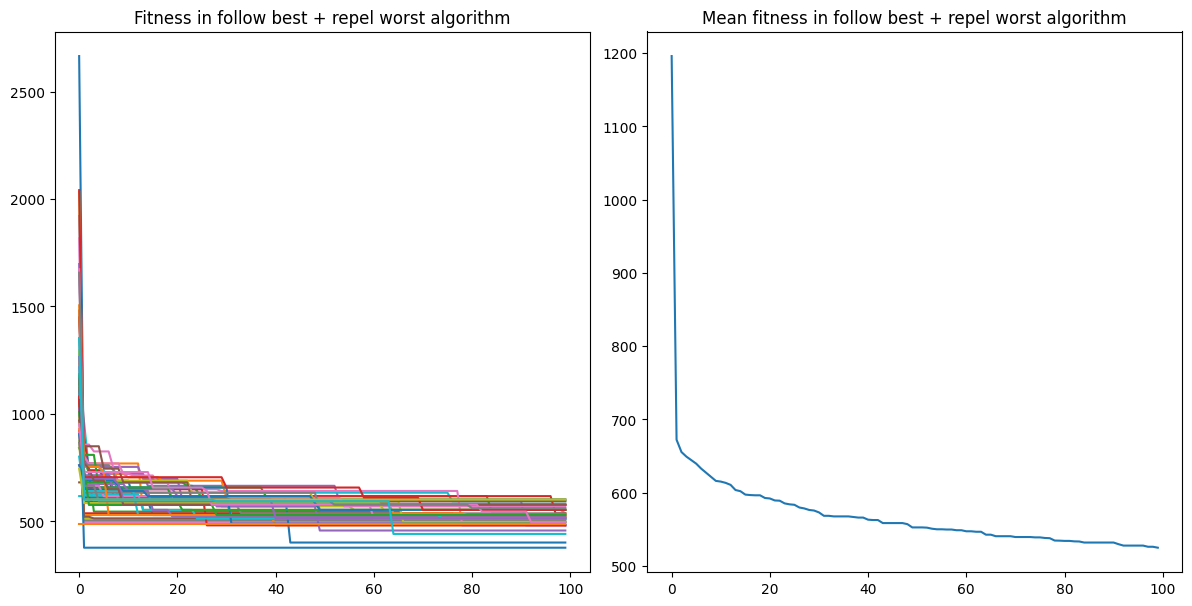

In [89]:
draw_fitness_plots(combo_best_gravity_fitness_observers, combo_best_gravity_fitness_mean, "follow best + repel worst")

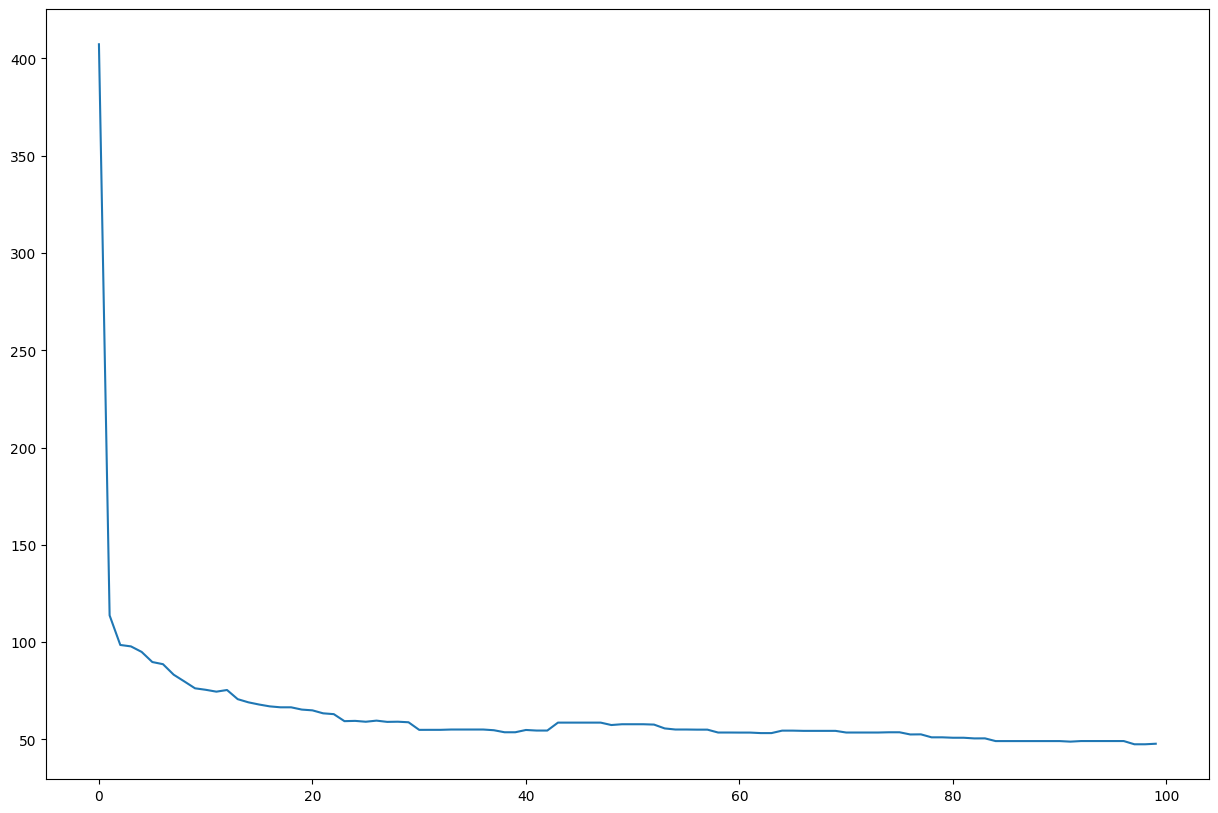

In [90]:
plt.plot(iterations_axis, combo_best_gravity_fitness_std)
plt.show()

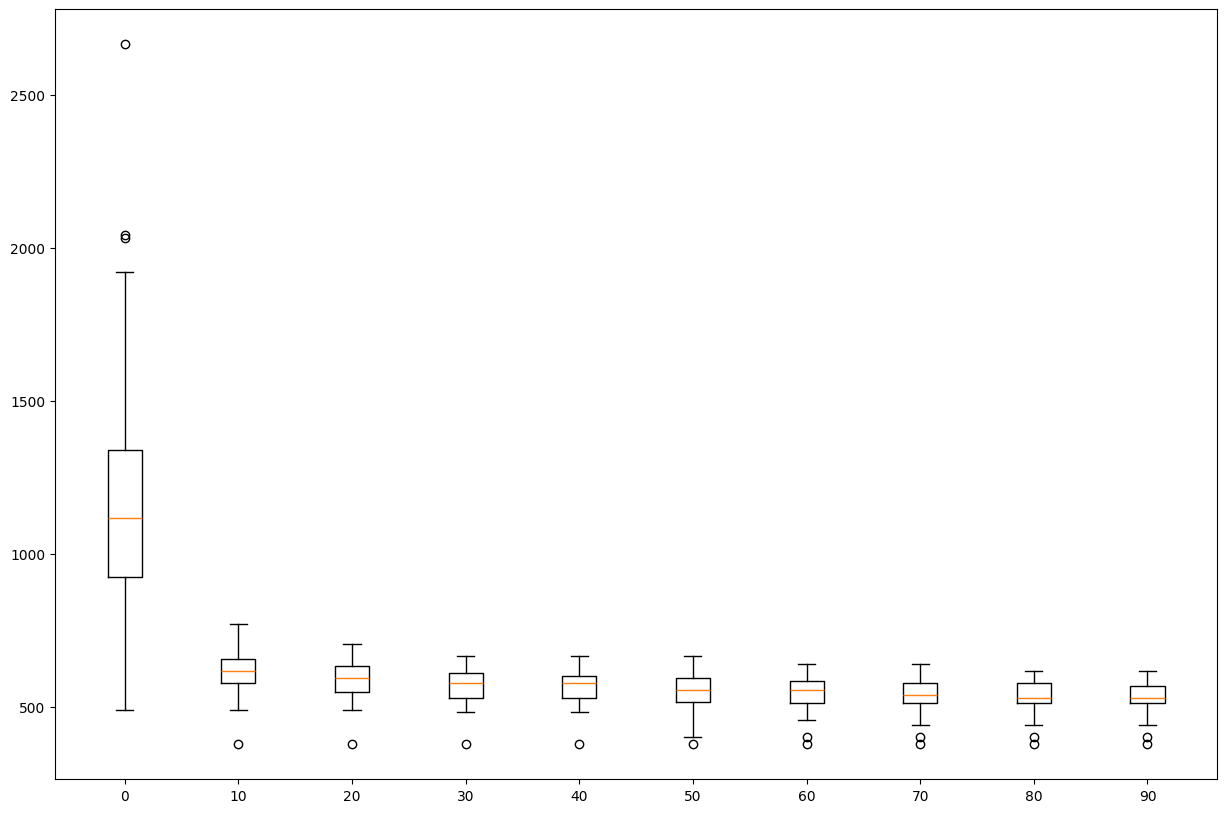

In [91]:
draw_fitness_boxplots(combo_best_gravity_fitness_observers)

## Follow Best + Repel Worst Gravity (1 gene)

In [ ]:
combo_best_gravity_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_fitness_observers1:
    run_genetic_algorithm(ComboBestGravity, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best + repel worst (1 gene)"].append(fitness_observer.fitness)

In [93]:
combo_best_gravity_fitness_mean1, combo_best_gravity_fitness_std1 = get_fitness_mean_and_std(combo_best_gravity_fitness_observers1)

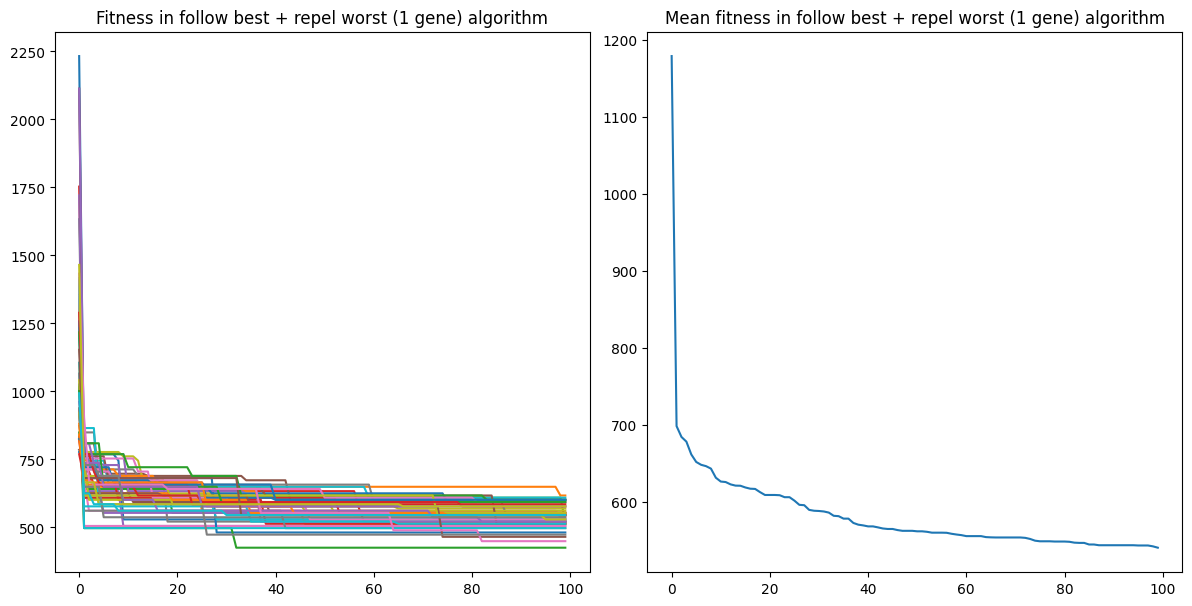

In [94]:
draw_fitness_plots(combo_best_gravity_fitness_observers1, combo_best_gravity_fitness_mean1, "follow best + repel worst (1 gene)")

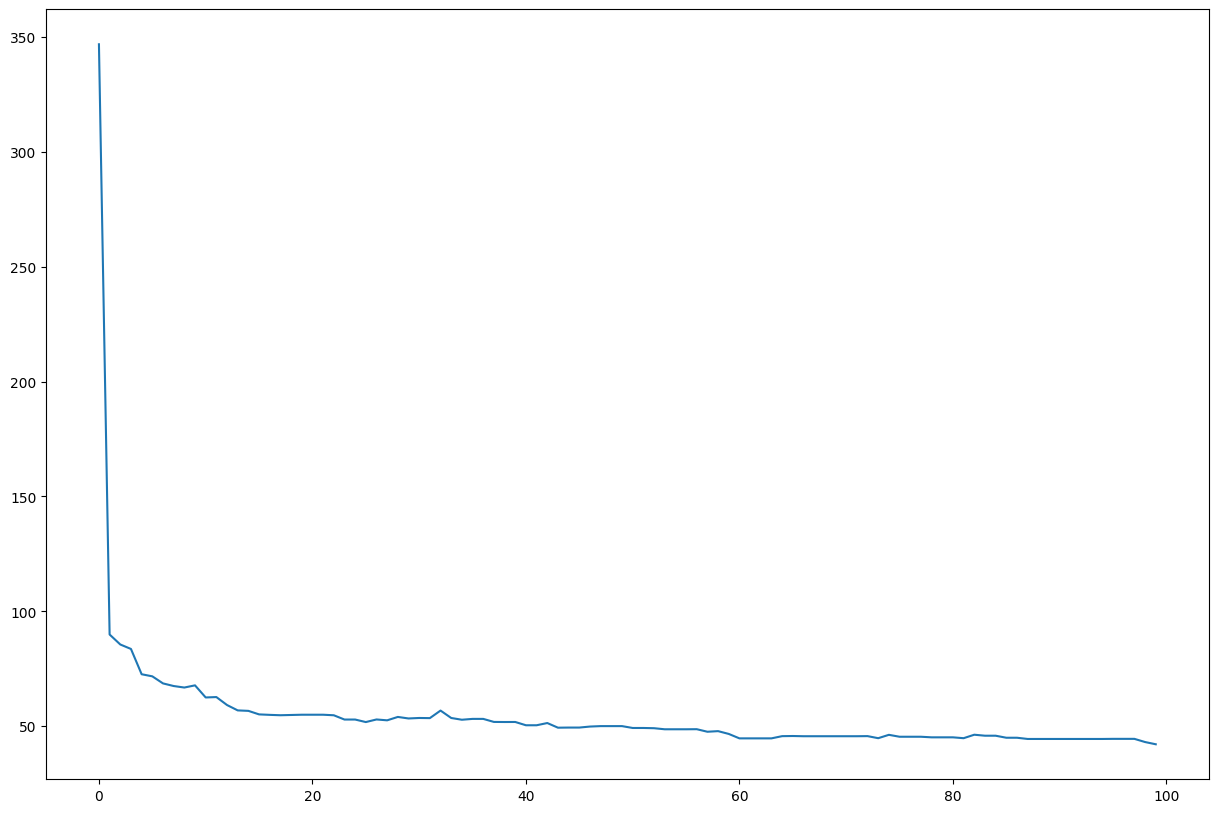

In [95]:
plt.plot(iterations_axis, combo_best_gravity_fitness_std1)
plt.show()

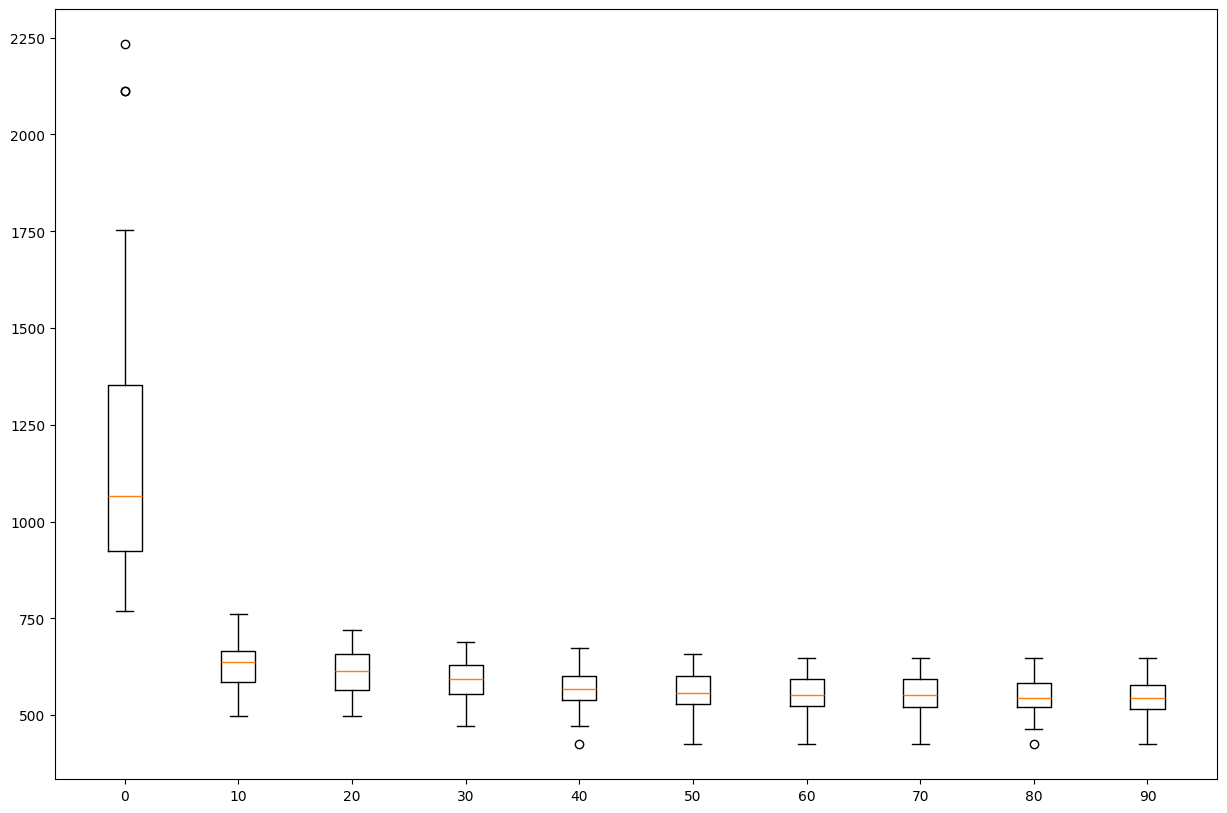

In [96]:
draw_fitness_boxplots(combo_best_gravity_fitness_observers1)

## Follow Best + Repel Worst Gravity Multistep

In [97]:
from combo_best_gravity_multistep import ComboBestGravityMultistep

In [ ]:
combo_best_gravity_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_multistep_fitness_observers:
    run_genetic_algorithm(ComboBestGravityMultistep, 0.5, observers=[fitness_observer])
    solutions["follow best + repel worst multistep"].append(fitness_observer.fitness)

In [99]:
combo_best_gravity_multistep_fitness_mean, combo_best_gravity_multistep_fitness_std = get_fitness_mean_and_std(combo_best_gravity_multistep_fitness_observers)

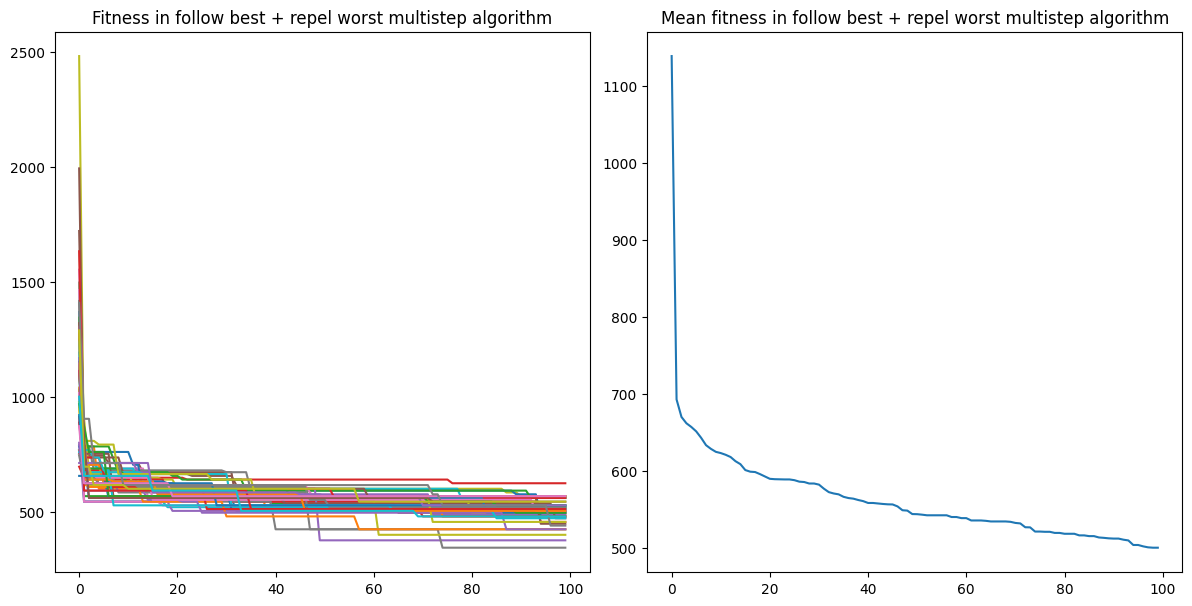

In [100]:
draw_fitness_plots(combo_best_gravity_multistep_fitness_observers, combo_best_gravity_multistep_fitness_mean, "follow best + repel worst multistep")

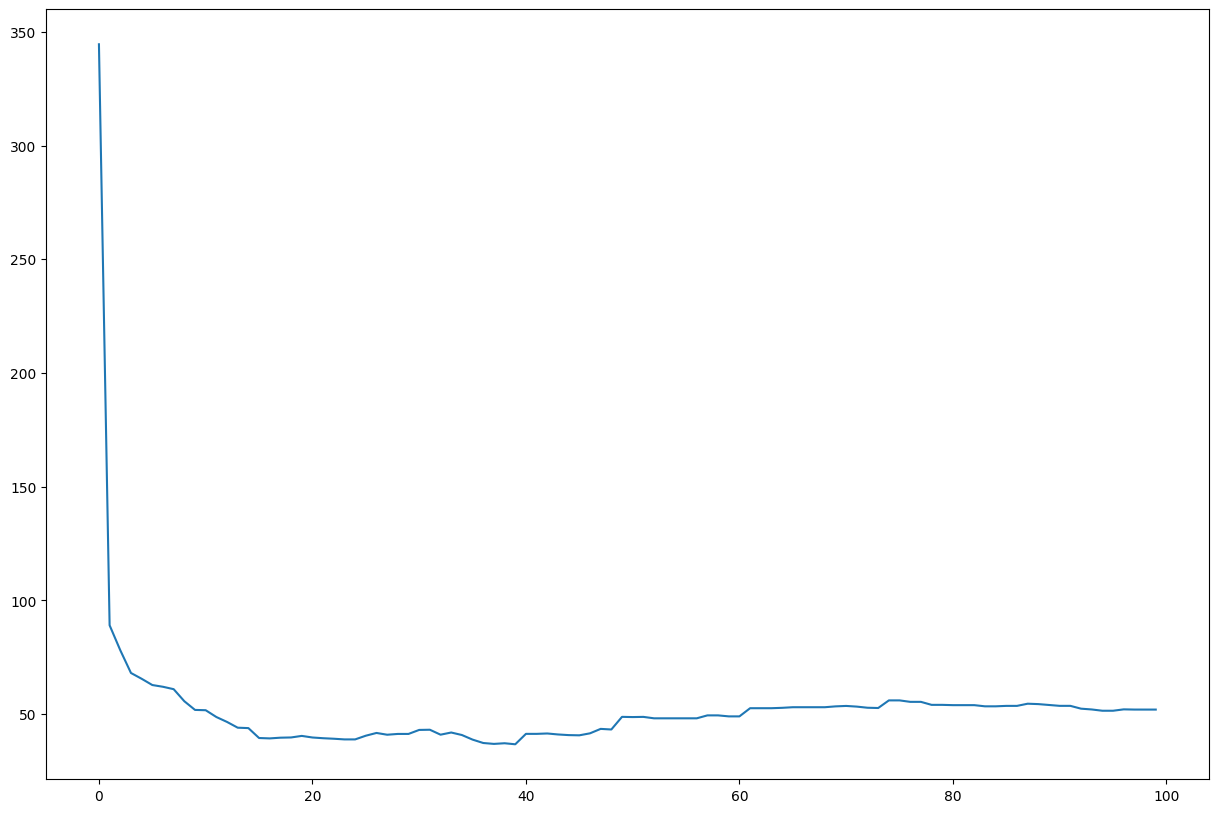

In [101]:
plt.plot(iterations_axis, combo_best_gravity_multistep_fitness_std)
plt.show()

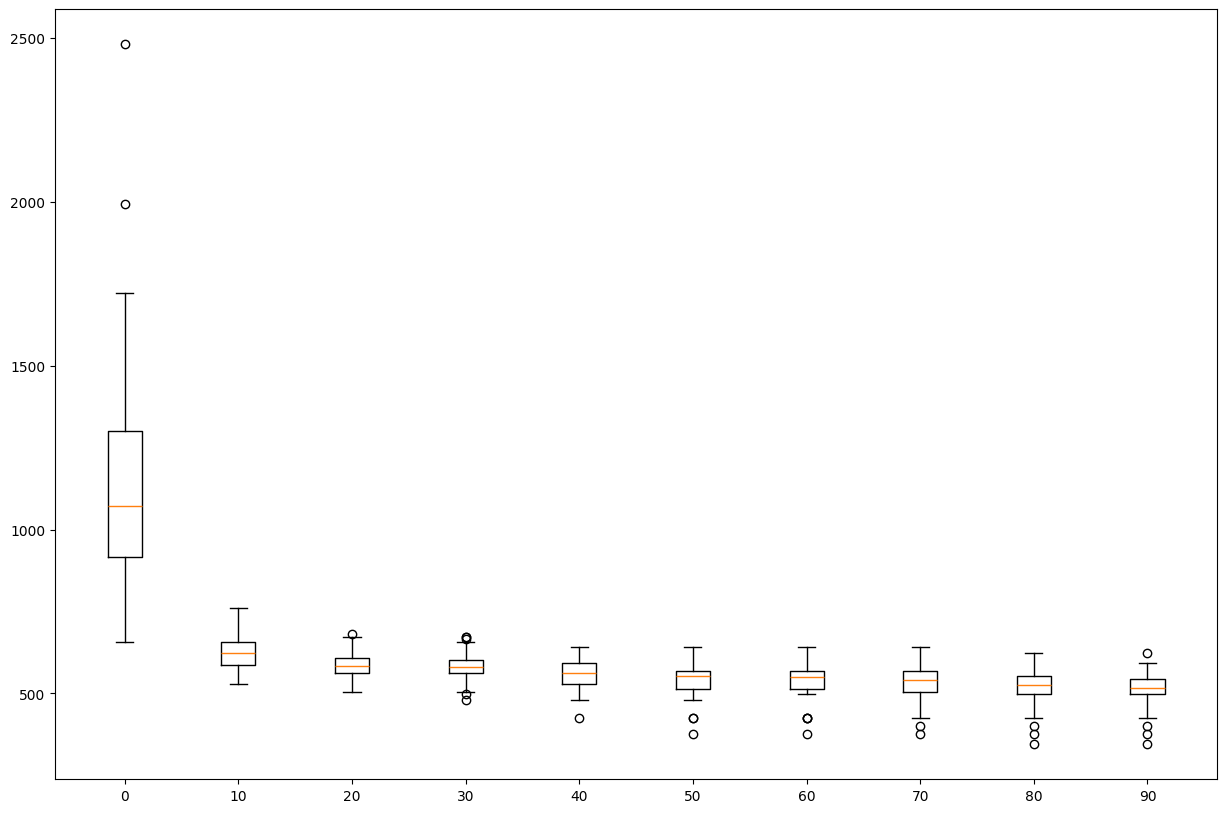

In [102]:
draw_fitness_boxplots(combo_best_gravity_multistep_fitness_observers)

## Follow Best + Repel Worst Gravity Multistep (1 gene)

In [ ]:
combo_best_gravity_multistep_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_multistep_fitness_observers1:
    run_genetic_algorithm(ComboBestGravityMultistep, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best + repel worst multistep (1 gene)"].append(fitness_observer.fitness)

In [104]:
combo_best_gravity_multistep_fitness_mean1, combo_best_gravity_multistep_fitness_std1 = get_fitness_mean_and_std(combo_best_gravity_multistep_fitness_observers1)

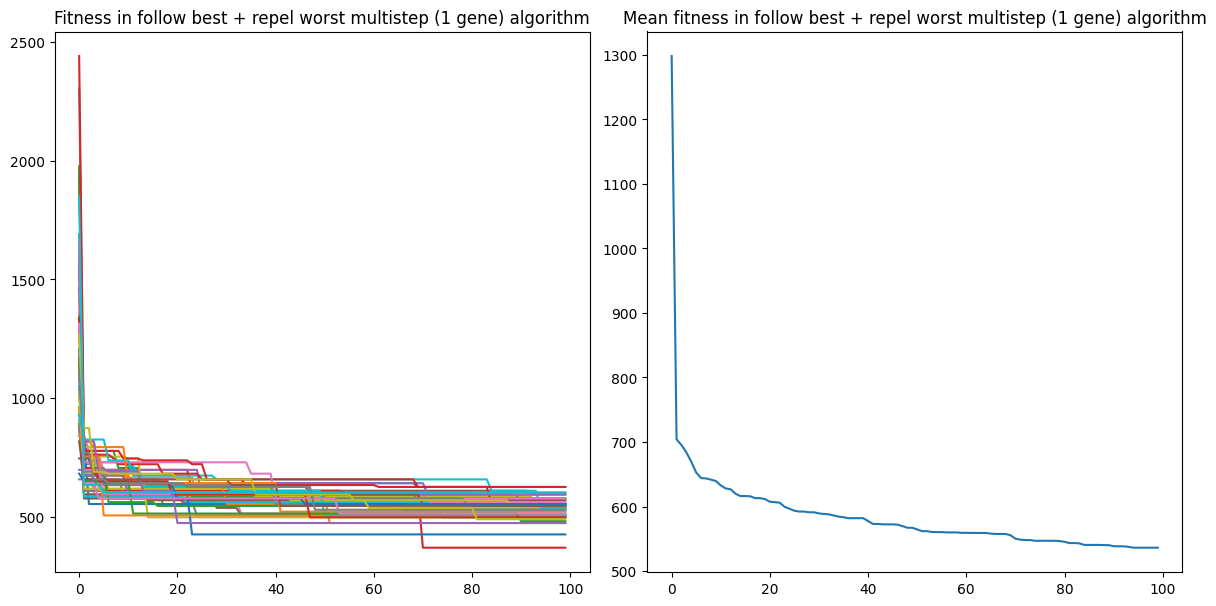

In [105]:
draw_fitness_plots(combo_best_gravity_multistep_fitness_observers1, combo_best_gravity_multistep_fitness_mean1, "follow best + repel worst multistep (1 gene)")

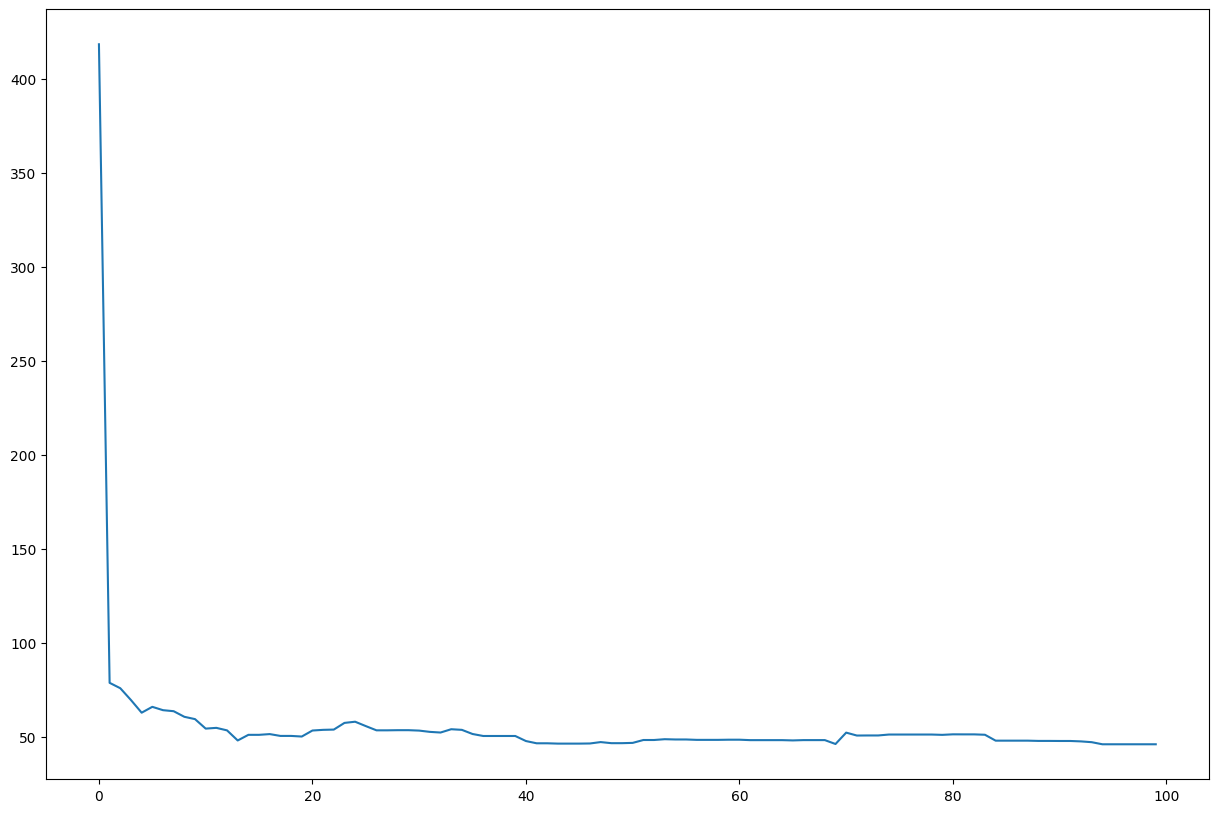

In [106]:
plt.plot(iterations_axis, combo_best_gravity_multistep_fitness_std1)
plt.show()

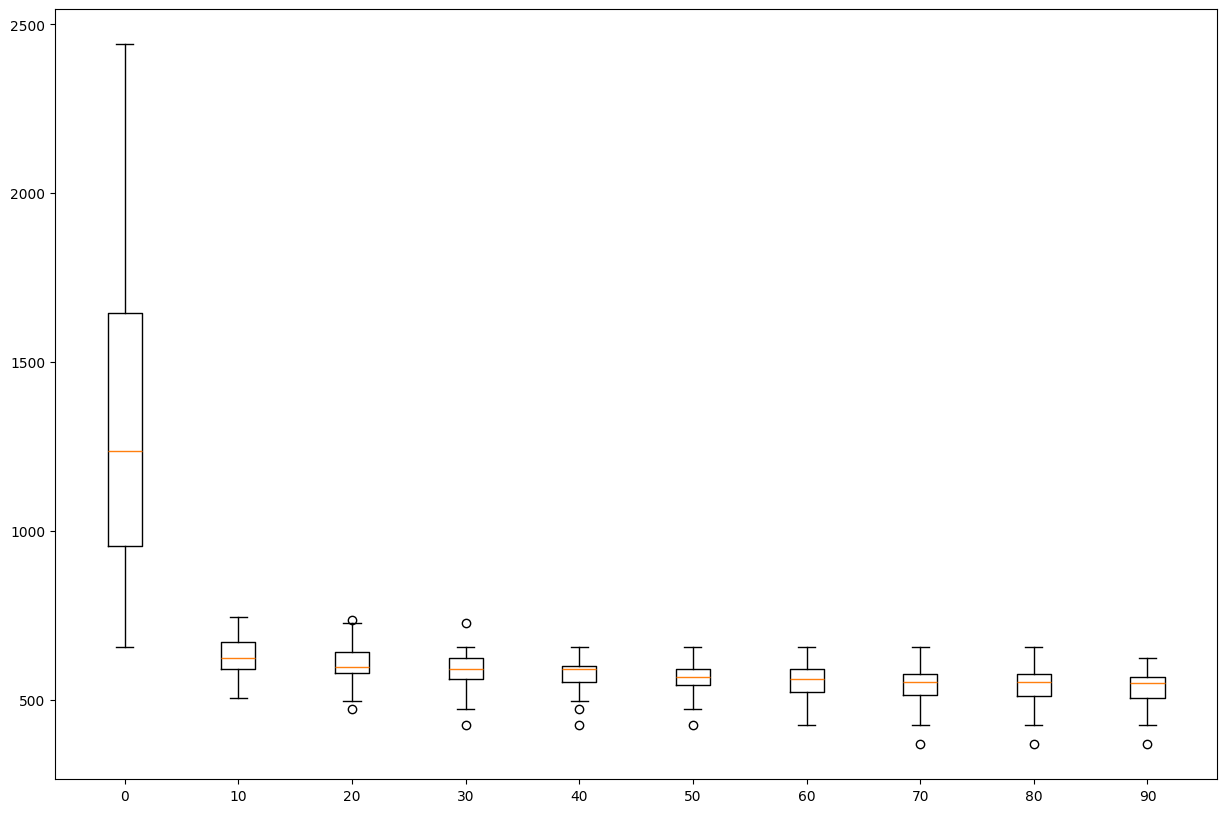

In [107]:
draw_fitness_boxplots(combo_best_gravity_multistep_fitness_observers1)

## Follow Best Distinct + Repel Worst Gravity

In [108]:
from combo_distinct_gravity import ComboDistinctGravity

In [ ]:
combo_distinct_gravity_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_fitness_observers:
    run_genetic_algorithm(ComboDistinctGravity, 0.5, observers=[fitness_observer])
    solutions["follow best distinct + repel worst"].append(fitness_observer.fitness)

In [110]:
combo_distinct_gravity_fitness_mean, combo_distinct_gravity_fitness_std = get_fitness_mean_and_std(combo_distinct_gravity_fitness_observers)

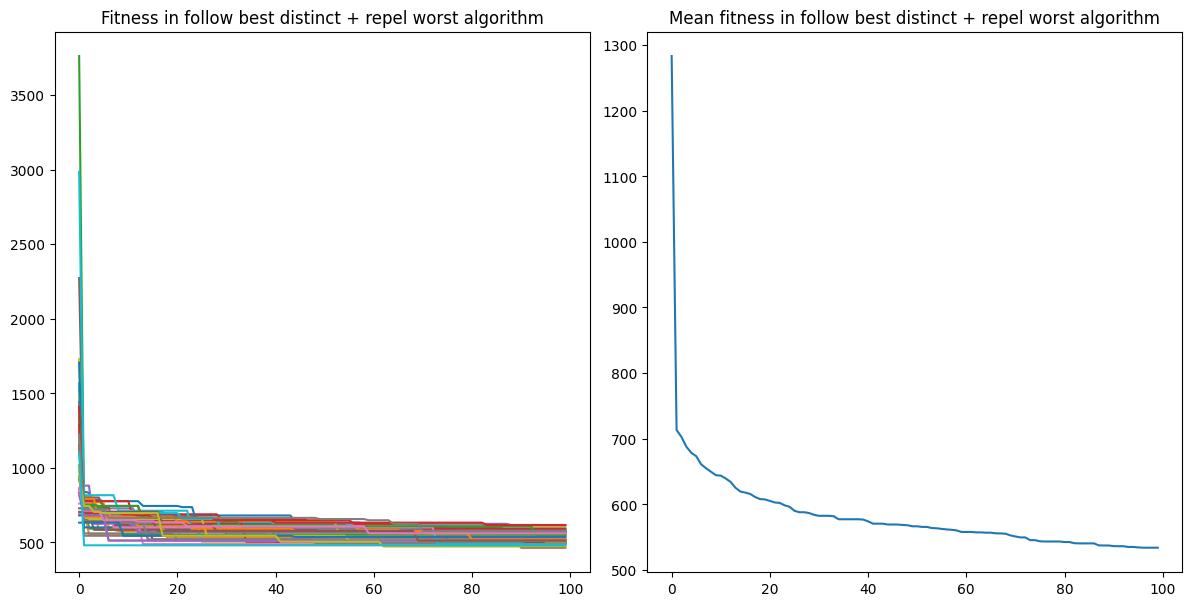

In [111]:
draw_fitness_plots(combo_distinct_gravity_fitness_observers, combo_distinct_gravity_fitness_mean, "follow best distinct + repel worst")

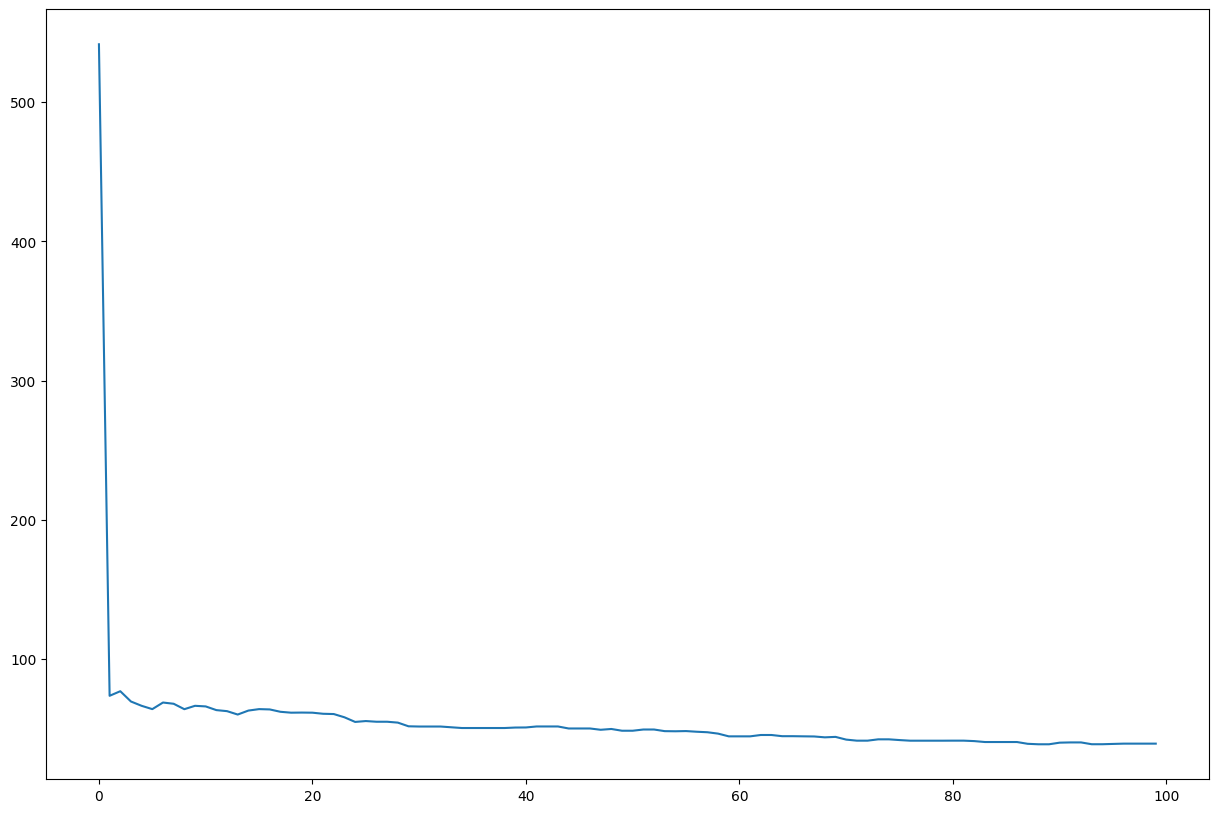

In [112]:
plt.plot(iterations_axis, combo_distinct_gravity_fitness_std)
plt.show()

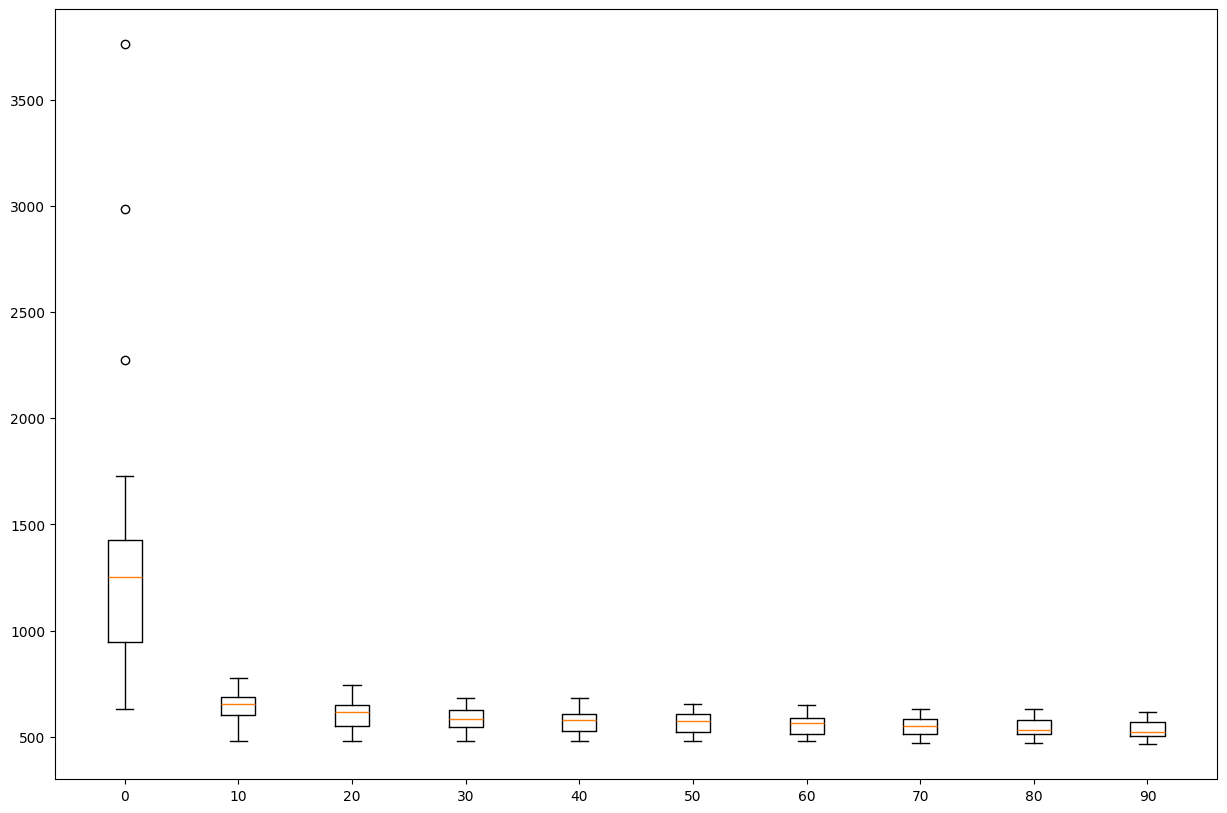

In [113]:
draw_fitness_boxplots(combo_distinct_gravity_fitness_observers)

## Follow Best Distinct + Repel Worst Gravity (1 gene)

In [ ]:
combo_distinct_gravity_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_fitness_observers1:
    run_genetic_algorithm(ComboDistinctGravity, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best distinct + repel worst (1 gene)"].append(fitness_observer.fitness)

In [115]:
combo_distinct_gravity_fitness_mean1, combo_distinct_gravity_fitness_std1 = get_fitness_mean_and_std(combo_distinct_gravity_fitness_observers1)

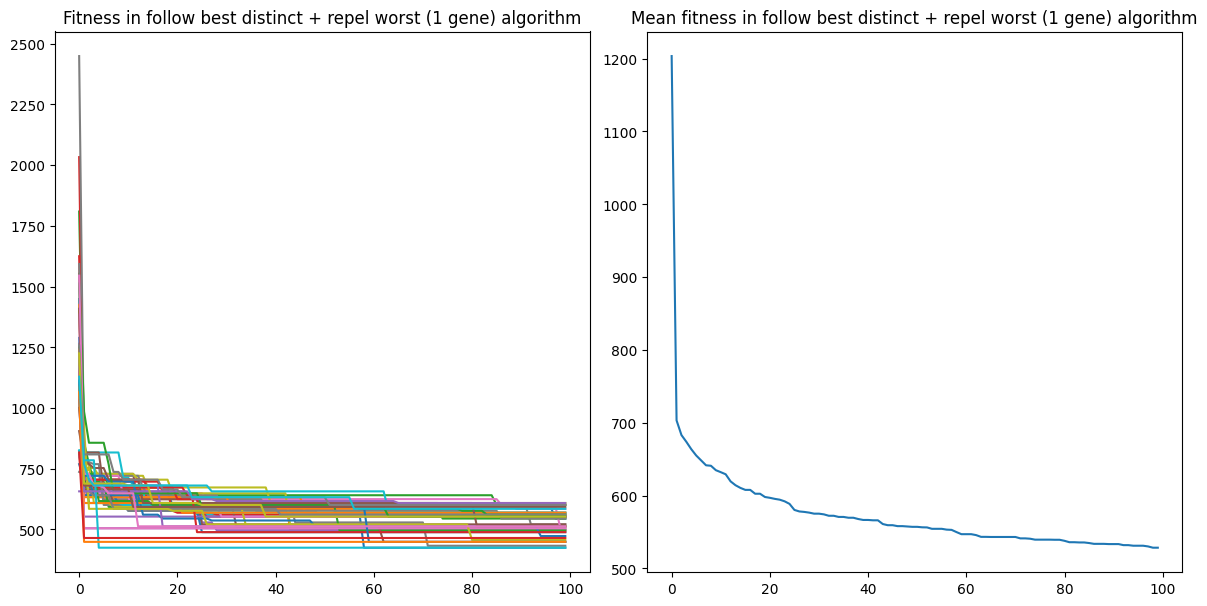

In [116]:
draw_fitness_plots(combo_distinct_gravity_fitness_observers1, combo_distinct_gravity_fitness_mean1, "follow best distinct + repel worst (1 gene)")

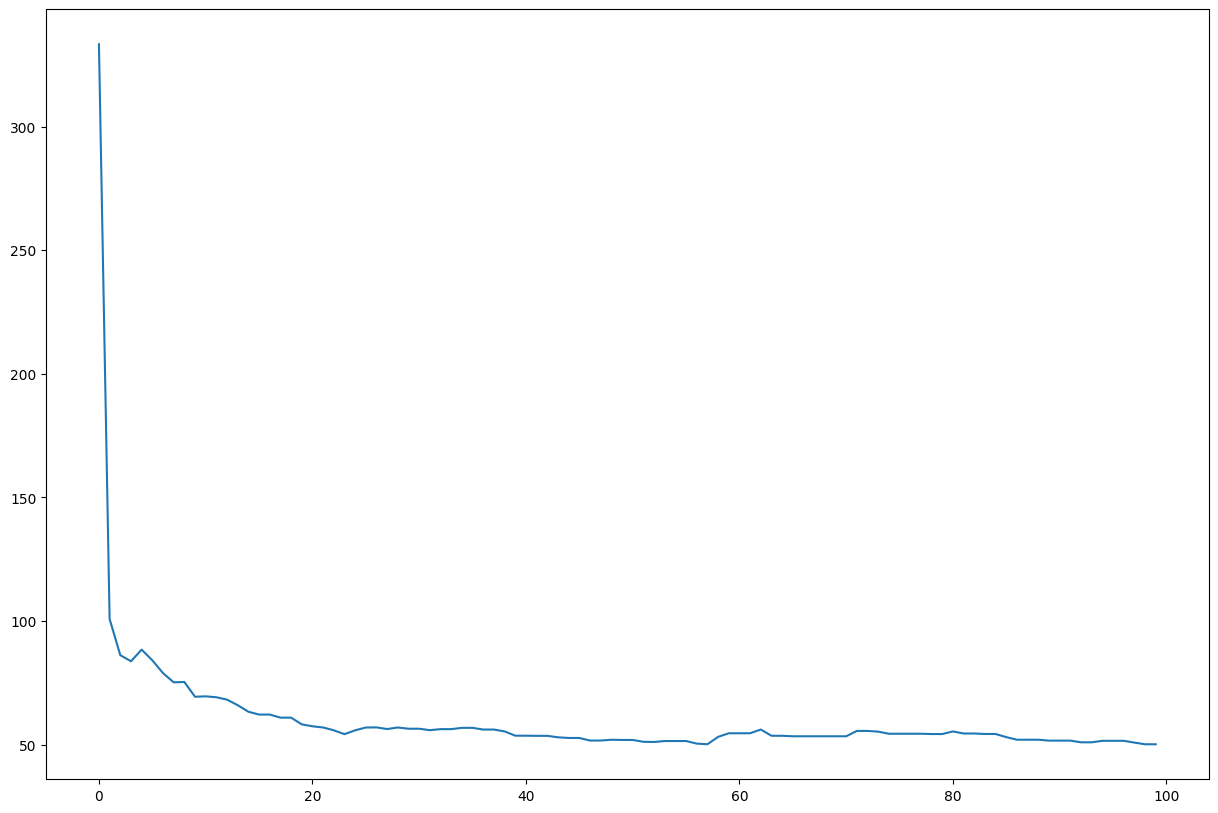

In [117]:
plt.plot(iterations_axis, combo_distinct_gravity_fitness_std1)
plt.show()

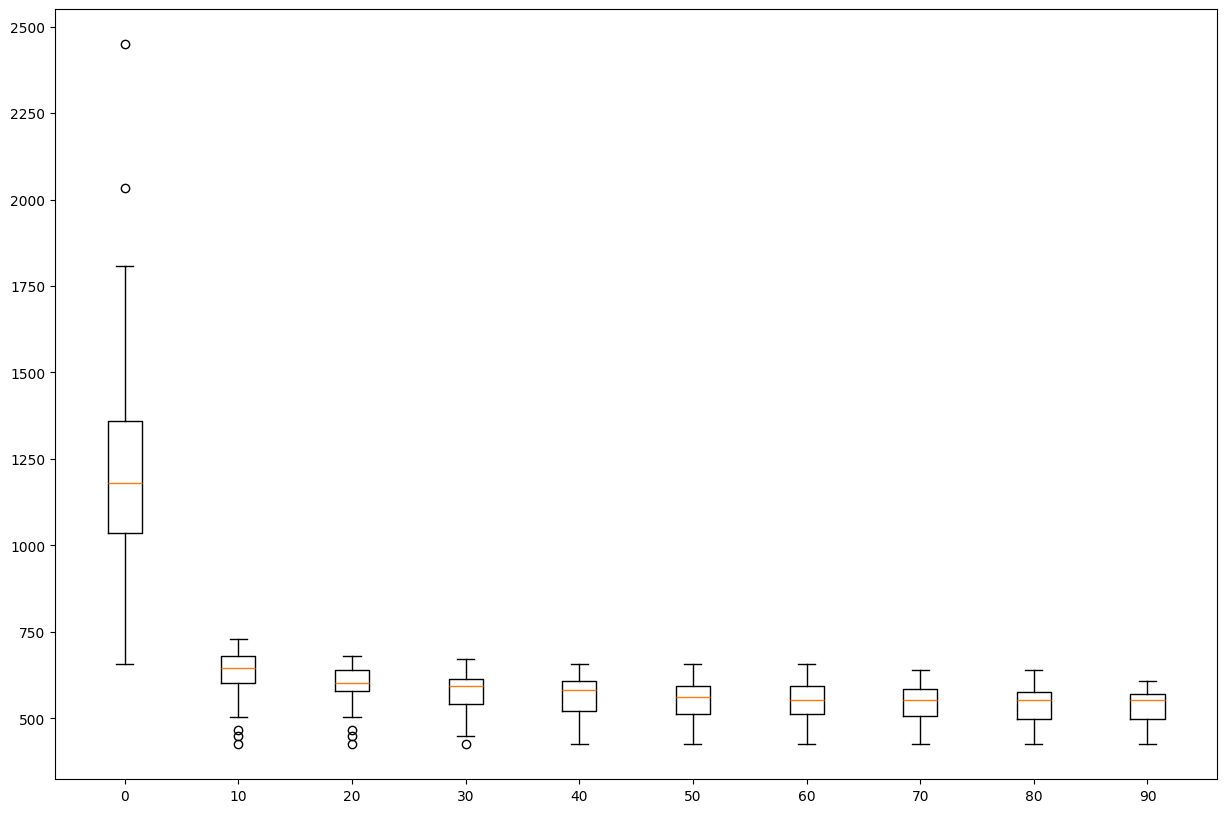

In [118]:
draw_fitness_boxplots(combo_distinct_gravity_fitness_observers1)

## Follow Best Distinct + Repel Worst Gravity Multistep

In [119]:
from combo_distinct_gravity_multistep import ComboDistinctGravityMultistep

In [ ]:
combo_distinct_gravity_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_multistep_fitness_observers:
    run_genetic_algorithm(ComboDistinctGravityMultistep, 0.5, observers=[fitness_observer])
    solutions["follow best distinct + repel worst multistep"].append(fitness_observer.fitness)

In [121]:
combo_distinct_gravity_multistep_fitness_mean, combo_distinct_gravity_multistep_fitness_std = get_fitness_mean_and_std(combo_distinct_gravity_multistep_fitness_observers)

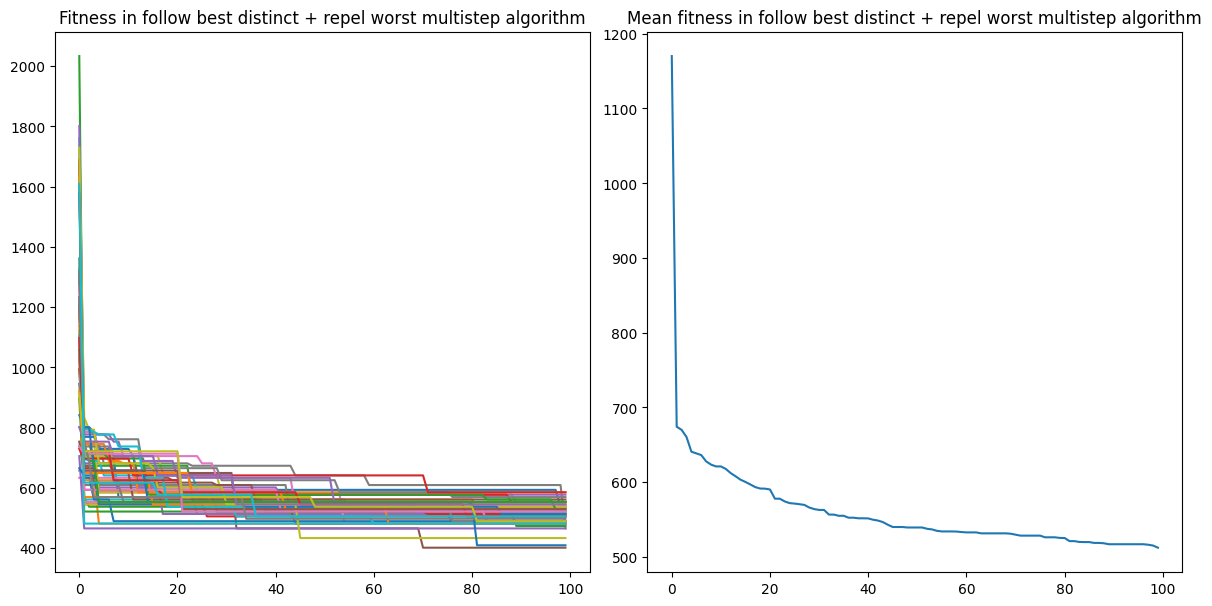

In [122]:
draw_fitness_plots(combo_distinct_gravity_multistep_fitness_observers, combo_distinct_gravity_multistep_fitness_mean, "follow best distinct + repel worst multistep")

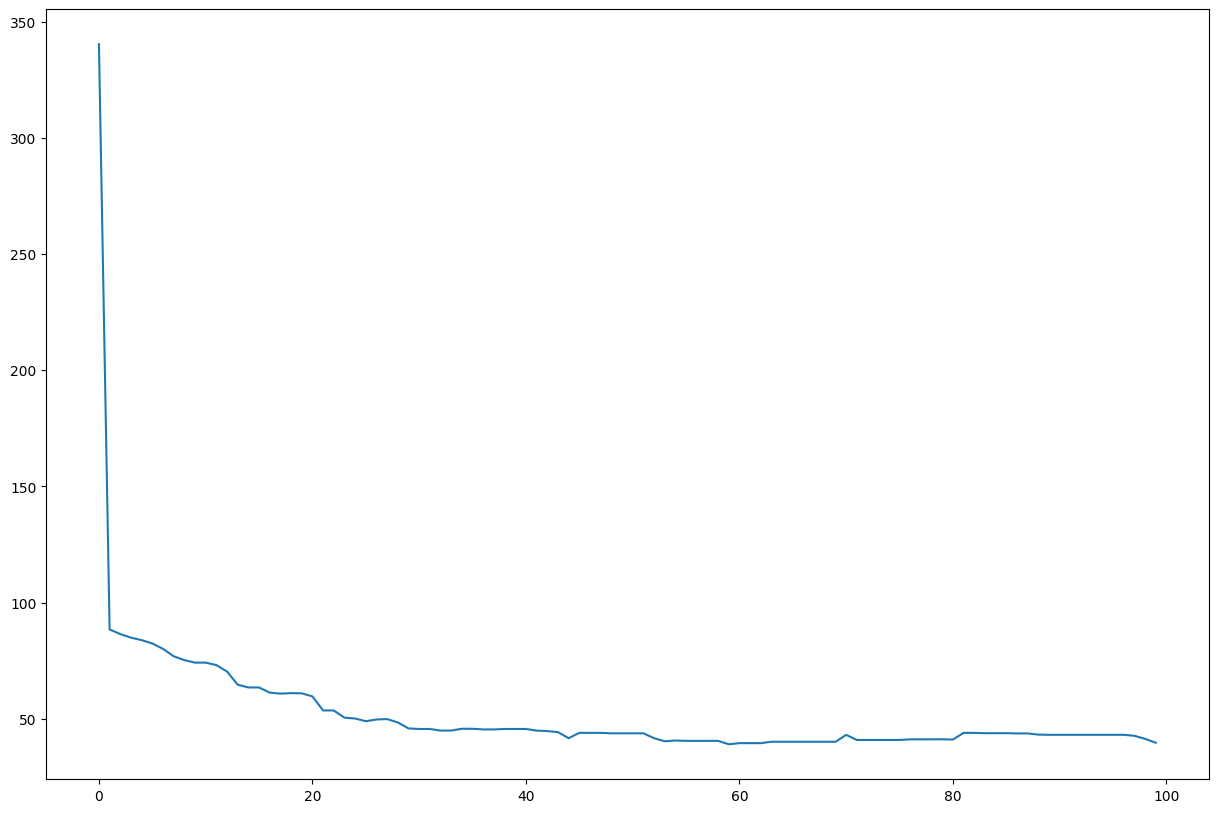

In [123]:
plt.plot(iterations_axis, combo_distinct_gravity_multistep_fitness_std)
plt.show()

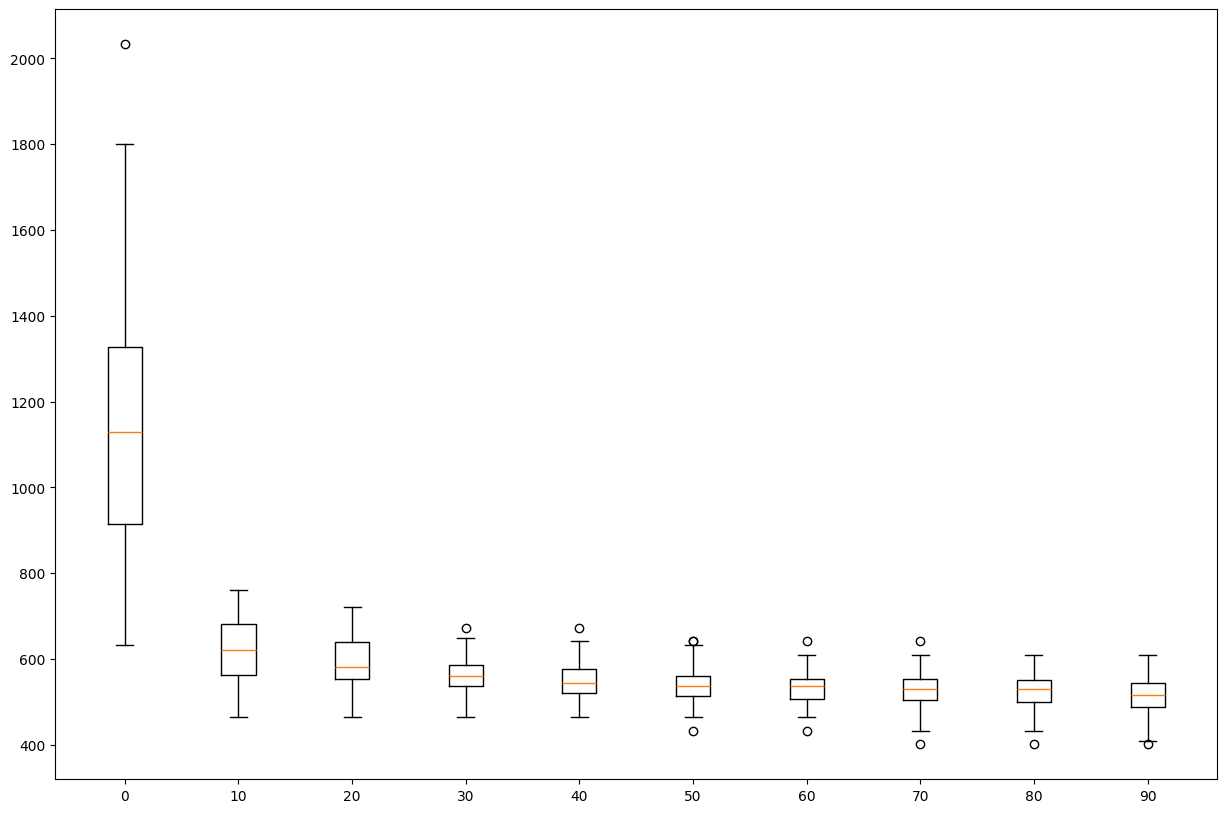

In [124]:
draw_fitness_boxplots(combo_distinct_gravity_multistep_fitness_observers)

## Follow Best Distinct + Repel Worst Gravity Multistep (1 gene)

In [ ]:
combo_distinct_gravity_multistep_fitness_observers1 = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_multistep_fitness_observers1:
    run_genetic_algorithm(ComboDistinctGravityMultistep, 0.5, observers=[fitness_observer], mutate_one_gene=True)
    solutions["follow best distinct + repel worst multistep (1 gene)"].append(fitness_observer.fitness)

In [126]:
combo_distinct_gravity_multistep_fitness_mean1, combo_distinct_gravity_multistep_fitness_std1 = get_fitness_mean_and_std(combo_distinct_gravity_multistep_fitness_observers1)

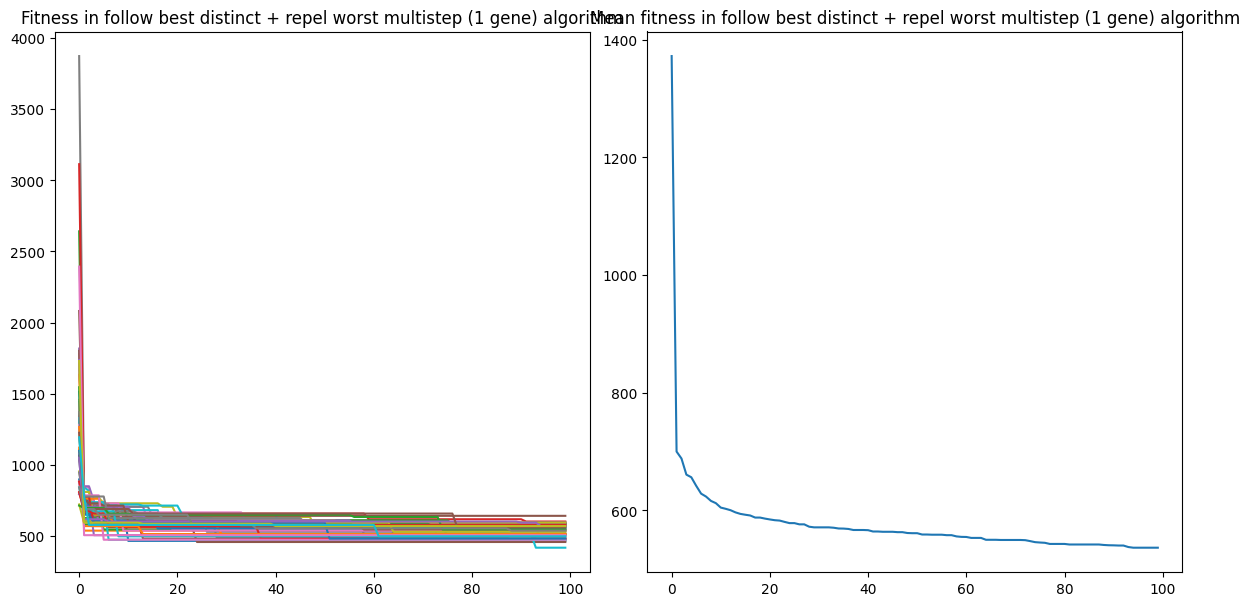

In [127]:
draw_fitness_plots(combo_distinct_gravity_multistep_fitness_observers1, combo_distinct_gravity_multistep_fitness_mean1, "follow best distinct + repel worst multistep (1 gene)")

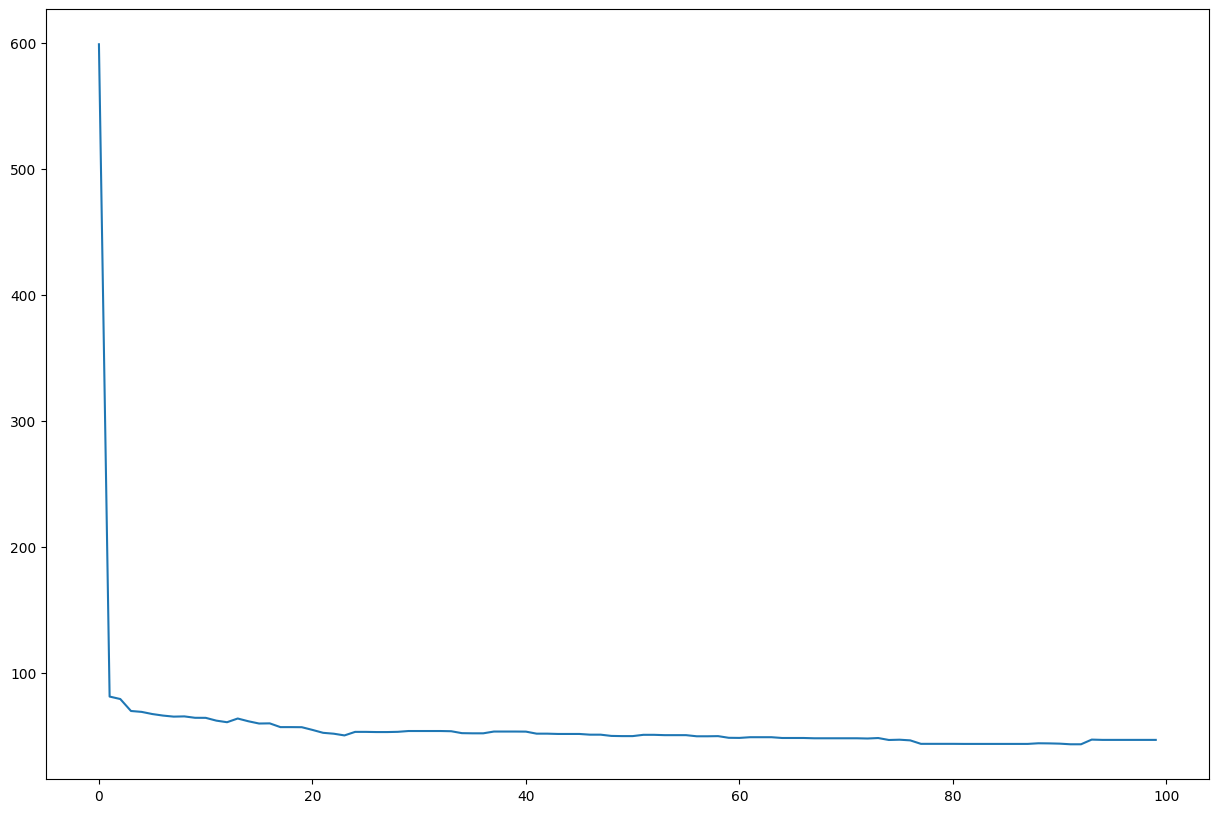

In [128]:
plt.plot(iterations_axis, combo_distinct_gravity_multistep_fitness_std1)
plt.show()

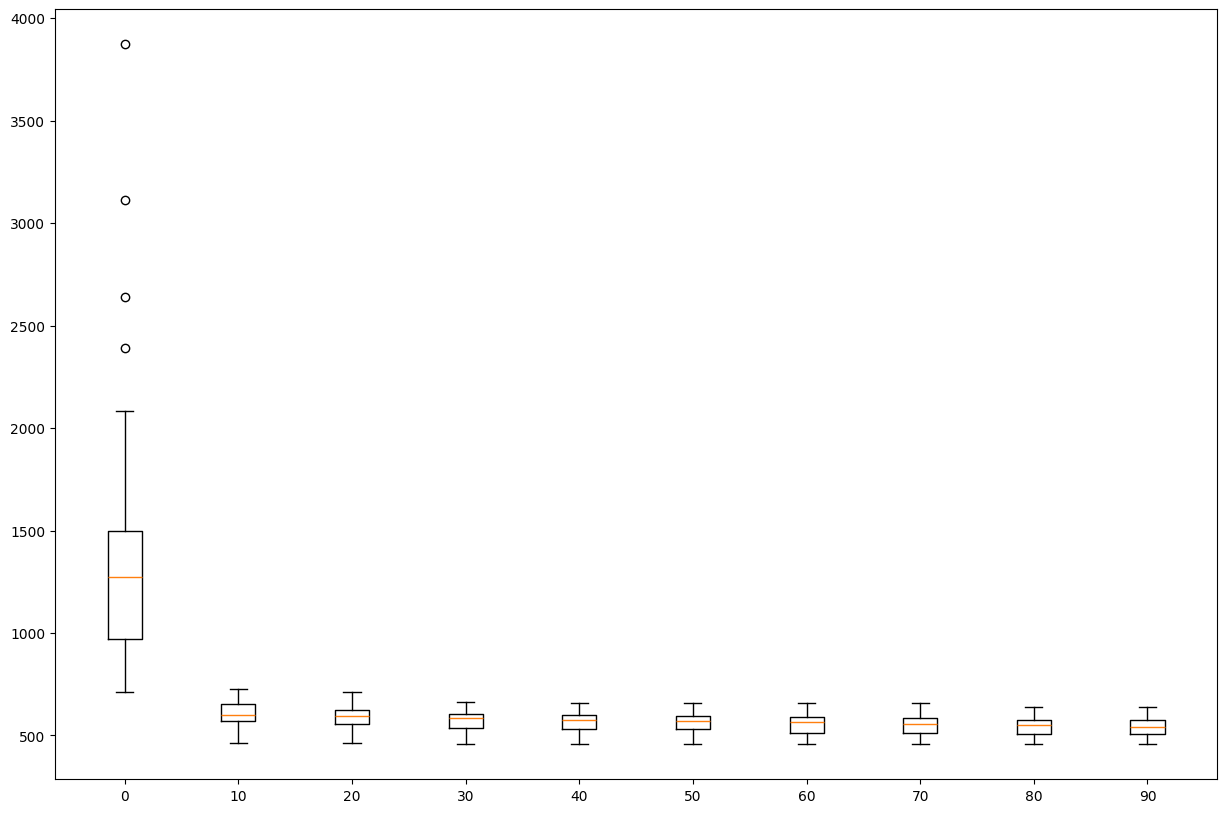

In [129]:
draw_fitness_boxplots(combo_distinct_gravity_multistep_fitness_observers1)

## Saving results

In [132]:
mean_fitness = {
    "base": base_fitness_mean,
    "follow best": follow_best_fitness_mean,
    "follow best (1 gene)": follow_best_fitness_mean1,
    "follow best distinct": follow_best_distinct_fitness_mean,
    "follow best distinct (1 gene)": follow_best_distinct_fitness_mean1,
    "repel worst": repel_worst_fitness_mean,
    "repel worst (1 gene)": repel_worst_fitness_mean1,
    "repel worst multistep": repel_worst_multistep_fitness_mean,
    "repel worst multistep (1 gene)": repel_worst_multistep_fitness_mean1,
    "follow best + repel worst": combo_best_gravity_fitness_mean,
    "follow best + repel worst (1 gene)": combo_best_gravity_fitness_mean1,
    "follow best + repel worst multistep": combo_best_gravity_multistep_fitness_mean,
    "follow best + repel worst multistep (1 gene)": combo_best_gravity_multistep_fitness_mean1,
    "follow best distinct + repel worst": combo_distinct_gravity_fitness_mean,
    "follow best distinct + repel worst (1 gene)": combo_distinct_gravity_fitness_mean1,
    "follow best distinct + repel worst multistep": combo_distinct_gravity_multistep_fitness_mean,
    "follow best distinct + repel worst multistep (1 gene)": combo_distinct_gravity_multistep_fitness_mean1
}

In [133]:
with open("results/results_fitness.json", "w") as f:
    json.dump(solutions, f, indent=4)
    
with open("results/results_fitness_mean.json", "w") as f:
    json.dump(mean_fitness, f, indent=4)

## Comparision

In [3]:
with open("results/results_fitness.json", "r") as f:
    solutions = json.load(f)
    
with open("results/results_fitness_mean.json", "r") as f:
    mean_fitness = json.load(f)


In [151]:
plt.rcParams["figure.figsize"] = (15, 10)

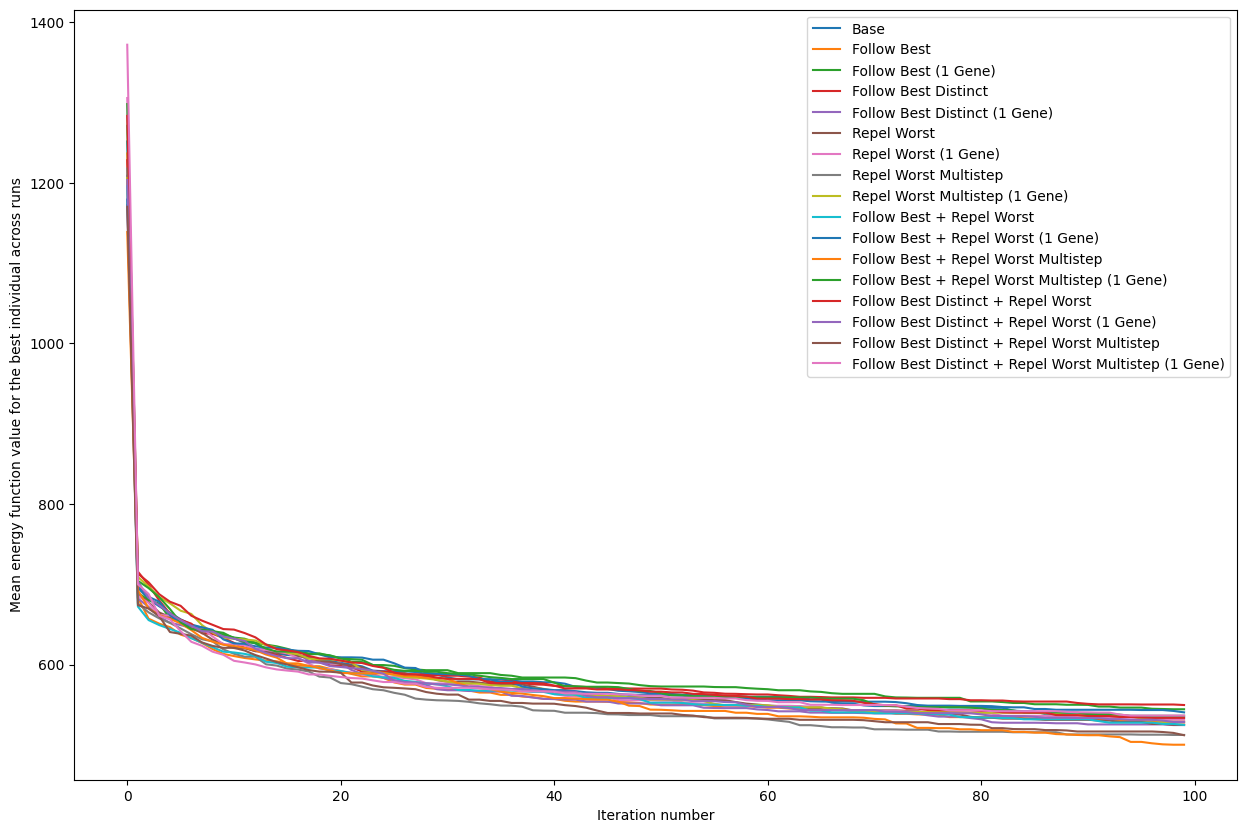

In [152]:
iterations_axis = [i for i in range(100)]
for key in mean_fitness:
    plt.plot(iterations_axis, mean_fitness[key], label=key.title())
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("Mean energy function value for the best individual across runs")
plt.savefig("results/variants_comparison_plot.jpg")
plt.show()

In [153]:
print("Comparison with base algorithm using Wilcoxon test")
base_solution = [fitness_list[-1] for fitness_list in solutions["base"]]
for algorithm_name, solution in solutions.items():
    if algorithm_name == "base":
        continue
    final_fitness = [fitness_list[-1] for fitness_list in solution]
    print(f"{algorithm_name}: {stats.wilcoxon(base_solution, final_fitness)}")

Comparison with base algorithm using Wilcoxon test
follow best: WilcoxonResult(statistic=467.0, pvalue=0.7431800251232177)
follow best (1 gene): WilcoxonResult(statistic=526.0, pvalue=0.8739333549638401)
follow best distinct: WilcoxonResult(statistic=402.0, pvalue=0.3904844136087958)
follow best distinct (1 gene): WilcoxonResult(statistic=461.5, pvalue=0.2764004596102786)
repel worst: WilcoxonResult(statistic=554.0, pvalue=0.9155848827010558)
repel worst (1 gene): WilcoxonResult(statistic=474.5, pvalue=0.34270977220084364)
repel worst multistep: WilcoxonResult(statistic=148.0, pvalue=3.750446653799062e-06)
repel worst multistep (1 gene): WilcoxonResult(statistic=376.5, pvalue=0.04674850904618005)
follow best + repel worst: WilcoxonResult(statistic=552.5, pvalue=0.9029261633664821)
follow best + repel worst (1 gene): WilcoxonResult(statistic=604.0, pvalue=0.9324456246496585)
follow best + repel worst multistep: WilcoxonResult(statistic=88.0, pvalue=7.440622302442385e-07)
follow best + r

In [5]:
relevant_algorithms = ['base', "follow best distinct + repel worst multistep", "follow best + repel worst multistep", "repel worst multistep"]

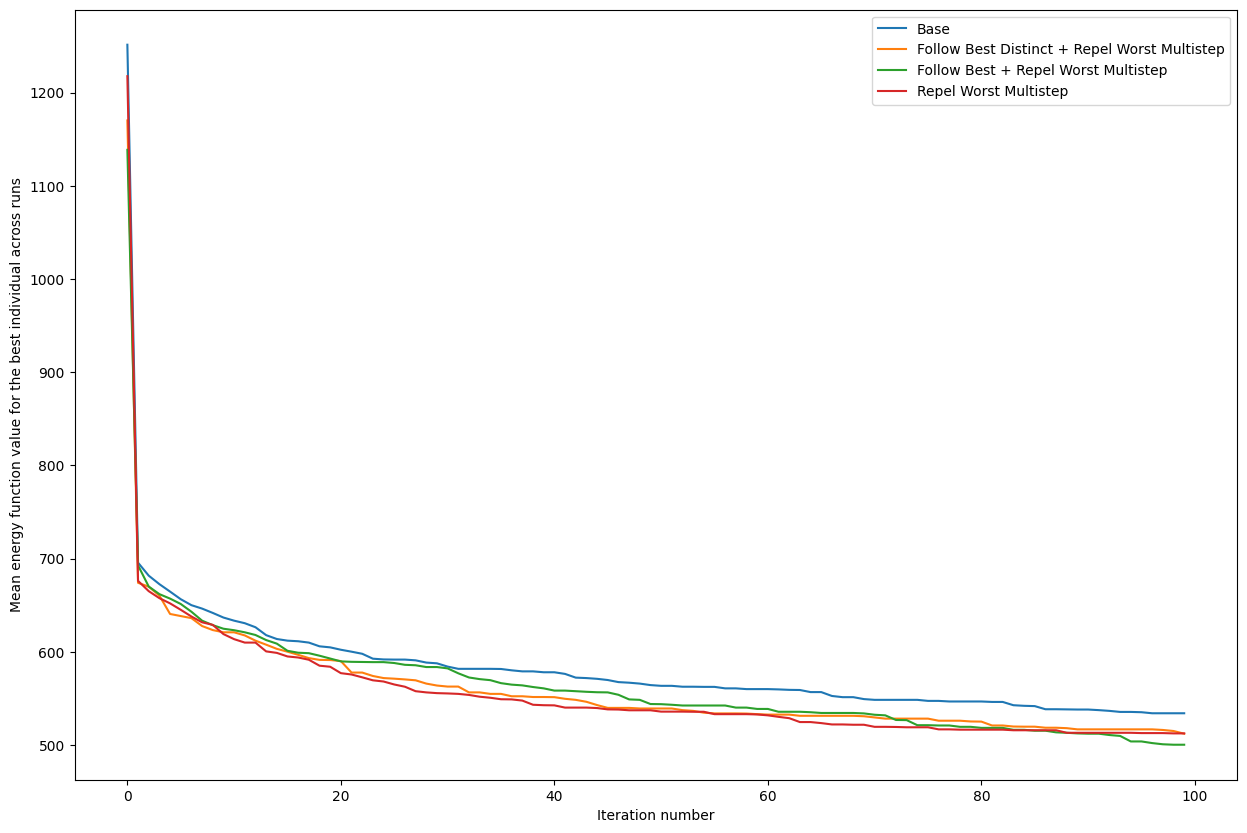

In [155]:

for key in relevant_algorithms:
    plt.plot(iterations_axis, mean_fitness[key], label=key.title())
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("Mean energy function value for the best individual across runs")
plt.savefig("results/relevant_variants_comparison_plot.jpg")
plt.show()

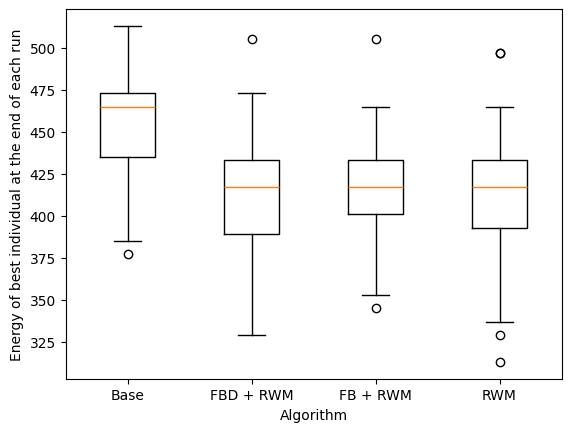

In [6]:
relevant_solutions = {key: [min(run) for run in solutions[key]] for key in relevant_algorithms}

labels = ["Base", "FBD + RWM", "FB + RWM", "RWM"]
plt.boxplot([relevant_solutions[key] for key in relevant_algorithms], labels=labels)
plt.xlabel("Algorithm")
plt.ylabel("Energy of best individual at the end of each run")
plt.savefig("results/boxplot_relevant.jpg")
plt.show()

In [157]:
for key, datum in relevant_solutions.items():
    print(key, min(datum))

base 377
follow best distinct + repel worst multistep 329
follow best + repel worst multistep 345
repel worst multistep 313


In [158]:
for key in mean_fitness:
    print(key, mean_fitness[key][-1])


base 533.96
follow best 528.04
follow best (1 gene) 544.36
follow best distinct 549.64
follow best distinct (1 gene) 524.68
repel worst 525.0
repel worst (1 gene) 531.24
repel worst multistep 512.36
repel worst multistep (1 gene) 528.68
follow best + repel worst 524.84
follow best + repel worst (1 gene) 540.52
follow best + repel worst multistep 500.2
follow best + repel worst multistep (1 gene) 536.2
follow best distinct + repel worst 533.64
follow best distinct + repel worst (1 gene) 528.52
follow best distinct + repel worst multistep 512.04
follow best distinct + repel worst multistep (1 gene) 536.52
